# **Data Science Project:** Optimizing E-Commerce Revenue - Classification and Clustering Insights

## **Author**: Hoang Le Chau

# Table of Contents

1. [Data Preparation](#data-preparation)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
3. [Feature Engineering](#feature-engineering)
3. [Data Modelling](#data-modelling)
   1. [Classification Tasks](#classification-tasks)
   2. [Clustering Tasks](#clustering-tasks)
4. [Innovative Model](#innovative-model)

# **1. Data Prepration**

In [62]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score

In [63]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

df = pd.concat([X, y], axis=1)

Numerical variables description

| Feature name                 | Feature description                                                              | Min. value | Max. value | SD       |
|------------------------------|-----------------------------------------------------------------------------------|------------|------------|----------|
| Administrative               | Number of pages visited by the visitor about account management                   | 0          | 27         | 3.32     |
| Administrative duration      | Total amount of time (in seconds) spent by the visitor on account management pages | 0          | 3398       | 176.70   |
| Informational                | Number of pages visited by the visitor about Web site, communication, and address information | 0          | 24         | 1.26     |
| Informational duration       | Total amount of time (in seconds) spent by the visitor on informational pages     | 0          | 2549       | 140.64   |
| Product related              | Number of pages visited by the visitor about product related pages                | 0          | 705        | 44.45    |
| Product related duration     | Total amount of time (in seconds) spent by the visitor on product related pages   | 0          | 63,973     | 1912.25  |
| Bounce rate                  | Average bounce rate value of the pages visited by the visitor                     | 0          | 0.2        | 0.04     |
| Exit rate                    | Average exit rate value of the pages visited by the visitor                       | 0          | 0.2        | 0.05     |
| Page value                   | Average page value of the pages visited by the visitor                            | 0          | 361        | 18.55    |
| Special day                  | Closeness of the site visiting time to a special day                              | 0          | 1.0        | 0.19     |


Categorical variables description

| Feature name    | Feature description                                                              | Number of categorical values |
|-----------------|-----------------------------------------------------------------------------------|------------------------------|
| OperatingSystems| Operating system of the visitor                                                  | 8                            |
| Browser         | Browser of the visitor                                                           | 13                           |
| Region          | Geographic region from which the session has been started by the visitor          | 9                            |
| TrafficType     | Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct) | 20                           |
| VisitorType     | Visitor type as “New Visitor,” “Returning Visitor,” and “Other”                   | 3                            |
| Weekend         | Boolean value indicating whether the date of the visit is weekend                | 2                            |
| Month           | Month value of the visit date                                                    | 12                           |
| Revenue         | Class label indicating whether the visit has been finalized with a transaction    | 2                            |


In [ ]:
df.head(10)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   
7                     0.0               0                 0.000000   
8                     0.0               2                37.000000   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0   Feb                 1   
1     0.000000   0.100000         0.0         0.0   Feb                 2   
2     0.200000   0.200000         0.0         0.0   Feb                 4   
3     0.050000   0.140000         0.0         0.0   Feb                 3   
4     0.020000   0.050000         0.0         0.0   Feb                 3   
5     0.015789   0.024561         0.0         0.0   Feb                 2   
6     0.200000   0.200000         0.0         0.4   Feb                 2   
7     0.200000   0.200000         0.0         0.0   Feb                 1   
8     0.000000   0.100000         0.0         0.8   Feb                 2   
9     0.000000   0.022222         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
6        4       3            3  Returning_Visitor    False    False  
7        2       1            5  Returning_Visitor     True    False  
8        2       2            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

In [ ]:
df.tail(10)

Administrative  Administrative_Duration  Informational  \
12320               0                     0.00              0   
12321               0                     0.00              0   
12322               6                    76.25              0   
12323               2                    64.75              0   
12324               0                     0.00              1   
12325               3                   145.00              0   
12326               0                     0.00              0   
12327               0                     0.00              0   
12328               4                    75.00              0   
12329               0                     0.00              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12320                     0.0               8               143.583333   
12321                     0.0               6                 0.000000   
12322                     0.0              22              1075.250000   
12323                     0.0              44              1157.976190   
12324                     0.0              16               503.000000   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12320     0.014286   0.050000    0.000000         0.0   Nov                 2   
12321     0.200000   0.200000    0.000000         0.0   Nov                 1   
12322     0.000000   0.004167    0.000000         0.0   Dec                 2   
12323     0.000000   0.013953    0.000000         0.0   Nov                 2   
12324     0.000000   0.037647    0.000000         0.0   Nov                 2   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12320        2       3            1  Returning_Visitor    False    False  
12321        8       4            1  Returning_Visitor    False    False  
12322        2       4            2  Returning_Visitor    False    False  
12323        2       1           10  Returning_Visitor    False    False  
12324        2       1            1  Returning_Visitor    False    False  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.duplicated().sum()

125

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe(include = 'all')

Administrative  Administrative_Duration  Informational  \
count     12205.000000             12205.000000   12205.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.338878                81.646331       0.508726   
std           3.330436               177.491845       1.275617   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 9.000000       0.000000   
75%           4.000000                94.700000       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12205.000000    12205.000000             12205.000000   
unique                     NaN             NaN                      NaN   
top                        NaN             NaN                      NaN   
freq                       NaN             NaN                      NaN   
mean                 34.825454       32.045637              1206.982457   
std                 141.424807       44.593649              1919.601400   
min                   0.000000        0.000000                 0.000000   
25%                   0.000000        8.000000               193.000000   
50%                   0.000000       18.000000               608.942857   
75%                   0.000000       38.000000              1477.154762   
max                2549.375000      705.000000             63973.522230   

         BounceRates     ExitRates    PageValues    SpecialDay  Month  \
count   12205.000000  12205.000000  12205.000000  12205.000000  12205   
unique           NaN           NaN           NaN           NaN     10   
top              NaN           NaN           NaN           NaN    May   
freq             NaN           NaN           NaN           NaN   3329   
mean        0.020370      0.041466      5.949574      0.061942    NaN   
std         0.045255      0.046163     18.653671      0.199666    NaN   
min         0.000000      0.000000      0.000000      0.000000    NaN   
25%         0.000000      0.014231      0.000000      0.000000    NaN   
50%         0.002899      0.025000      0.000000      0.000000    NaN   
75%         0.016667      0.048529      0.000000      0.000000    NaN   
max         0.200000      0.200000    361.763742      1.000000    NaN   

        OperatingSystems       Browser        Region   TrafficType  \
count       12205.000000  12205.000000  12205.000000  12205.000000   
unique               NaN           NaN           NaN           NaN   
top                  NaN           NaN           NaN           NaN   
freq                 NaN           NaN           NaN           NaN   
mean            2.124211      2.357804      3.153298      4.073904   
std             0.906823      1.710114      2.402340      4.016654   
min             1.000000      1.000000      1.000000      1.000000   
25%             2.000000      2.000000      1.000000      2.000000   
50%             2.000000      2.000000      3.000000      2.000000   
75%             3.000000      2.000000      4.000000      4.000000   
max             8.000000     13.000000      9.000000     20.000000   

              VisitorType Weekend Revenue  
count               12205   12205   12205  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10431    9346   10297  
mean                  NaN     NaN     NaN  
std                   NaN     NaN     NaN  
min                   NaN     NaN     NaN  
25%                   NaN     NaN     NaN  
50%                   NaN     NaN     NaN  
75%                   NaN     NaN     NaN  
max                   NaN     NaN     NaN

In [ ]:
num_cols = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
]
cat_cols =  [
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'VisitorType',
    'Weekend',
    'Month',
    'Revenue'
]

# cat_cols = df.select_dtypes(include=['object', 'bool']).columns.to_list()
# num_cols = df.select_dtypes(include=['float64','int64']).columns.to_list()
print("Categorical Variables: ", cat_cols)
print("Numerical Variables:", num_cols)

Categorical Variables:  ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'Revenue']
Numerical Variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


In [ ]:
categorical_values = cat_cols

# Get unique values for each categorical column
for col in categorical_values:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())

Unique values in column 'OperatingSystems':
[1 2 4 3 7 6 8 5]
Unique values in column 'Browser':
[ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Unique values in column 'Region':
[1 9 2 3 4 5 6 7 8]
Unique values in column 'TrafficType':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
Unique values in column 'VisitorType':
['Returning_Visitor' 'New_Visitor' 'Other']
Unique values in column 'Weekend':
[False  True]
Unique values in column 'Month':
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique values in column 'Revenue':
[False  True]


In [ ]:
numerical_values = num_cols

# Get value range for each numerical column
for col in numerical_values:
    print(f"Value range in column '{col}': " + str(df[col].min()) + " - " + str(df[col].max()))

Value range in column 'Administrative': 0 - 27
Value range in column 'Administrative_Duration': 0.0 - 3398.75
Value range in column 'Informational': 0 - 24
Value range in column 'Informational_Duration': 0.0 - 2549.375
Value range in column 'ProductRelated': 0 - 705
Value range in column 'ProductRelated_Duration': 0.0 - 63973.52223
Value range in column 'BounceRates': 0.0 - 0.2
Value range in column 'ExitRates': 0.0 - 0.2
Value range in column 'PageValues': 0.0 - 361.7637419
Value range in column 'SpecialDay': 0.0 - 1.0


In [ ]:
df_temp = df

# **2. Exploratory Data Analysis**

## **2.1. Explore Columns**

### **2.1.1. Numerical Features**

In [ ]:
# Define important columns for analysis
columns_to_explore = [
    'Revenue', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'TrafficType',
    'VisitorType', 'Month', 'Weekend', 'SpecialDay'
]

# Summarize numerical features
numerical_summary = df[columns_to_explore].describe()

# Display numerical features
numerical_summary

ProductRelated  ProductRelated_Duration   BounceRates     ExitRates  \
count    12205.000000             12205.000000  12205.000000  12205.000000   
mean        32.045637              1206.982457      0.020370      0.041466   
std         44.593649              1919.601400      0.045255      0.046163   
min          0.000000                 0.000000      0.000000      0.000000   
25%          8.000000               193.000000      0.000000      0.014231   
50%         18.000000               608.942857      0.002899      0.025000   
75%         38.000000              1477.154762      0.016667      0.048529   
max        705.000000             63973.522230      0.200000      0.200000   

         PageValues   TrafficType    SpecialDay  
count  12205.000000  12205.000000  12205.000000  
mean       5.949574      4.073904      0.061942  
std       18.653671      4.016654      0.199666  
min        0.000000      1.000000      0.000000  
25%        0.000000      2.000000      0.000000  
50%        0.000000      2.000000      0.000000  
75%        0.000000      4.000000      0.000000  
max      361.763742     20.000000      1.000000

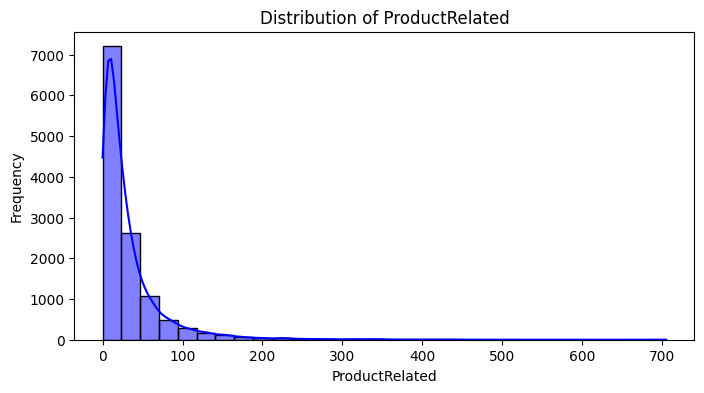

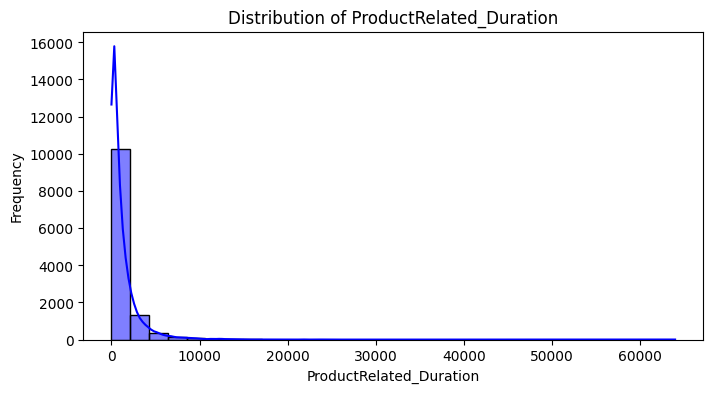

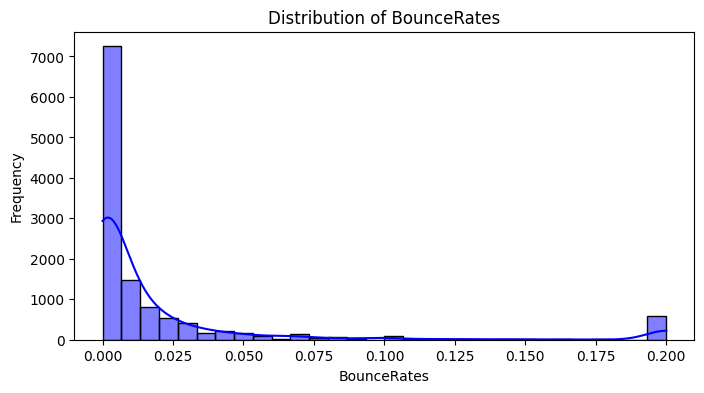

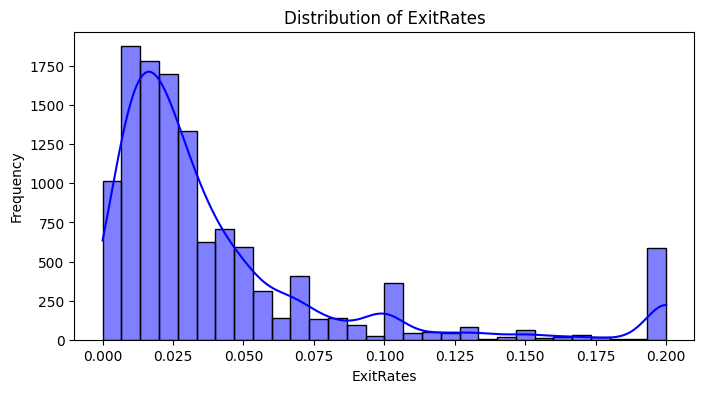

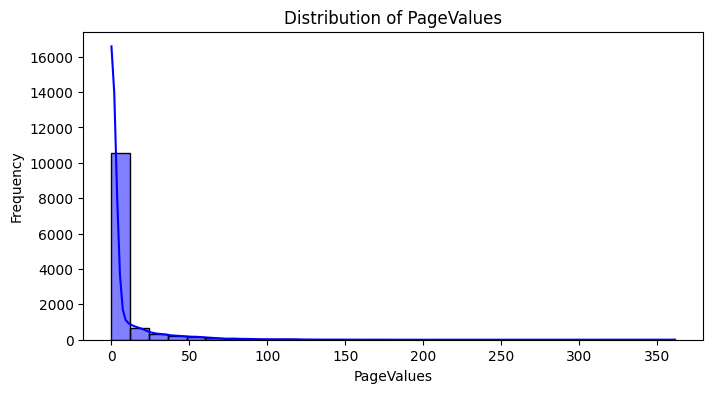

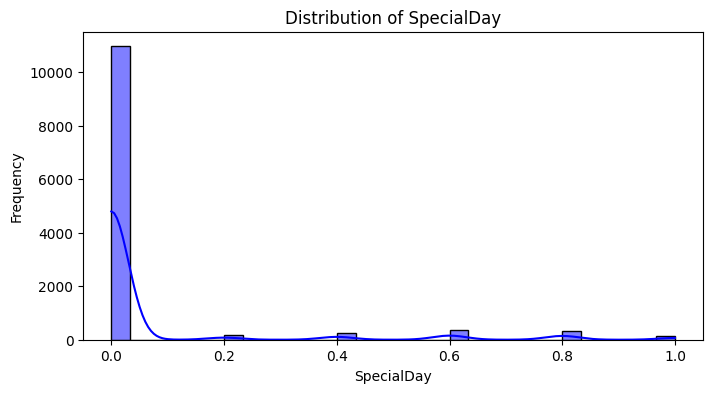

In [ ]:
# Plot histograms for numerical columns
numerical_cols = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates',
                  'ExitRates', 'PageValues', 'SpecialDay']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Numerical Features Analysis**:
- **ProductRelated**: The number of product-related pages viewed is highly skewed, with most sessions viewing fewer pages. The maximum value of 705 indicates a few sessions with extensive browsing.
- **ProductRelated_Duration**: Skewed heavily with a long tail; a few sessions have extraordinarily long durations, hinting at potential outliers.
- **BounceRates**: Most values are near zero, with a few sessions having higher bounce rates.
- **ExitRates**: Follows a similar trend to BounceRates, with a low mean value.
- **PageValues**: Majority of sessions have a value of zero, indicating no purchase activity for those sessions.
- **SpecialDay**: Mostly zeros, except for sessions close to holidays or significant events.

### **2.1.2. Categorical Features**

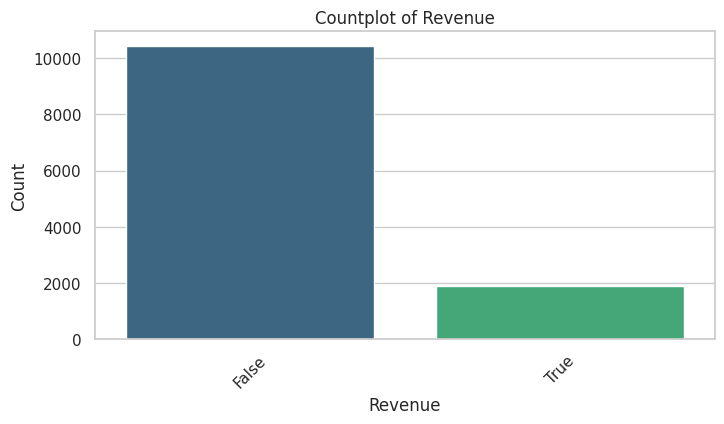

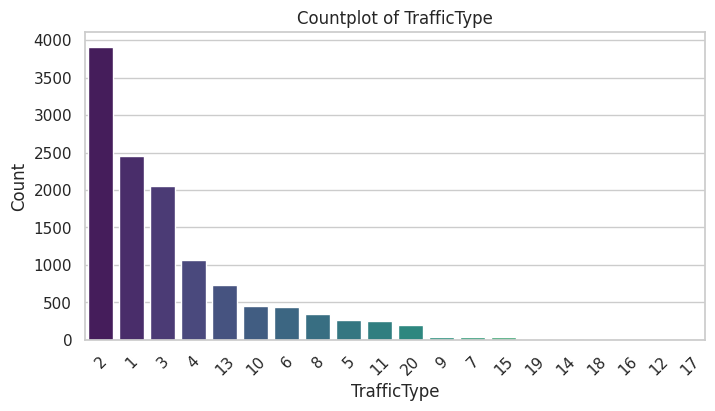

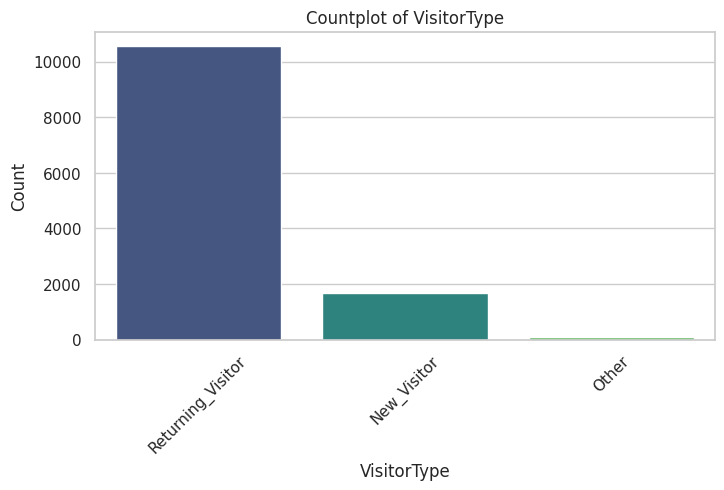

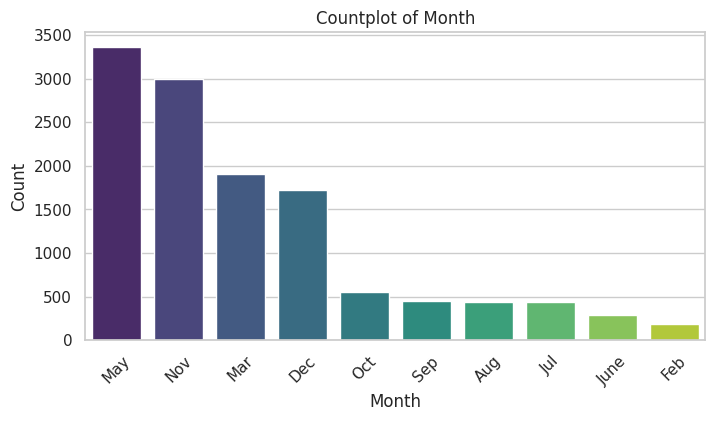

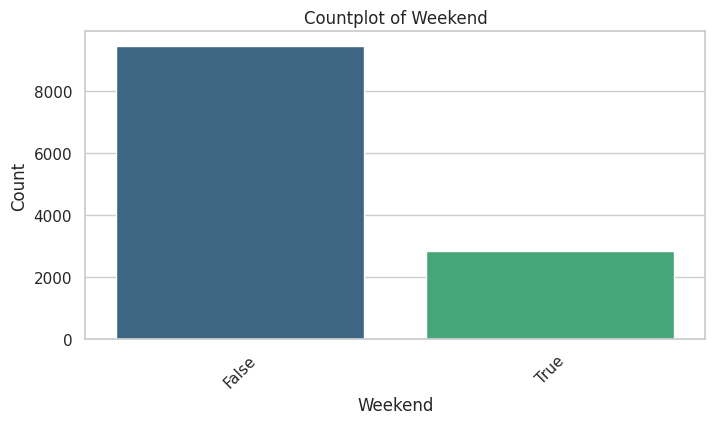

In [65]:
# Analyze categorical columns
categorical_cols = ['Revenue', 'TrafficType', 'VisitorType', 'Month', 'Weekend']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**Categorical Features Analysis**:
- **Revenue**: Significant class imbalance, with most sessions not ending in a purchase.
- **TrafficType**: Diverse sources, with a few dominating categories.
- **VisitorType**: Majority are returning visitors, a potential signal for better engagement.
- **Month**: Some months (e.g., May) dominate session activity.
- **Weekend**: Fewer sessions occur on weekends.

### **2.1.3. Outlier Analysis**

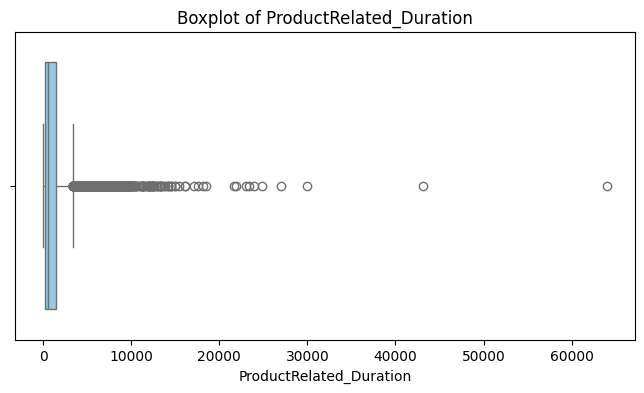

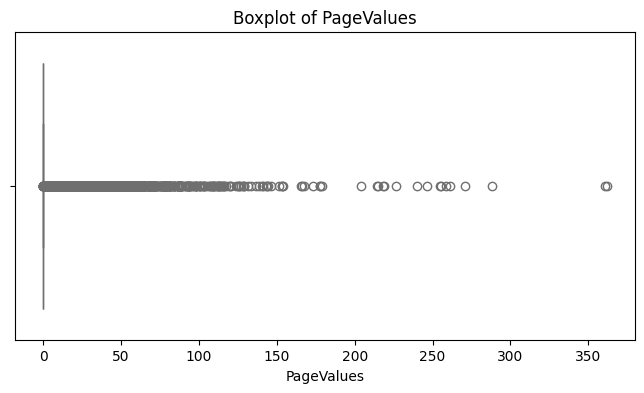

In [ ]:
# Outlier Analysis for ProductRelated_Duration and PageValues
numerical_outliers = ['ProductRelated_Duration', 'PageValues']
for col in numerical_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

**Outliers**:
   - **ProductRelated_Duration**: Extreme outliers with session durations significantly exceeding the majority.
   - **PageValues**: Outliers observed at high page values, indicating potential high-value transactions.

## **2.2. Explore Pairs of Attributes**

<Figure size 1500x800 with 0 Axes>

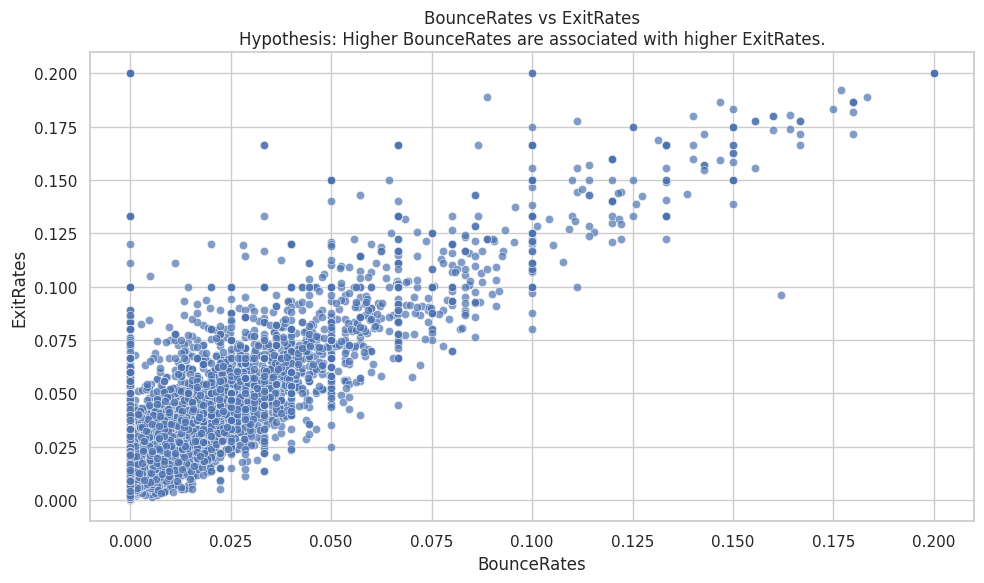

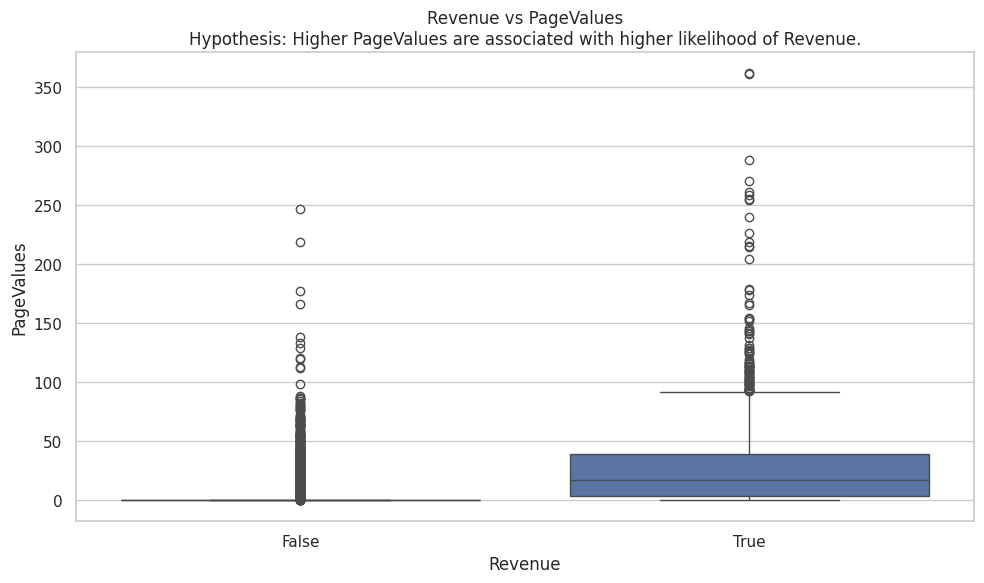

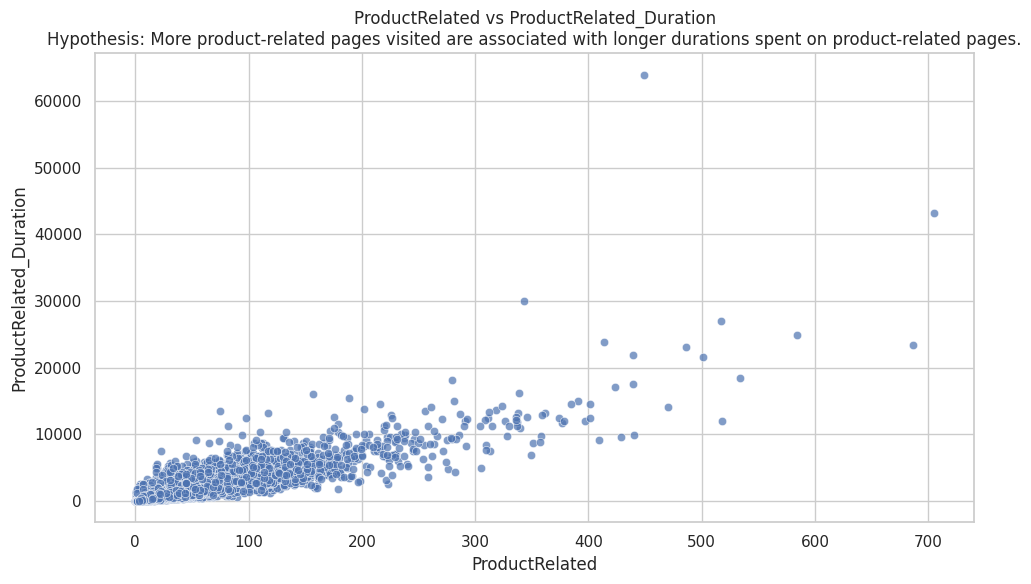

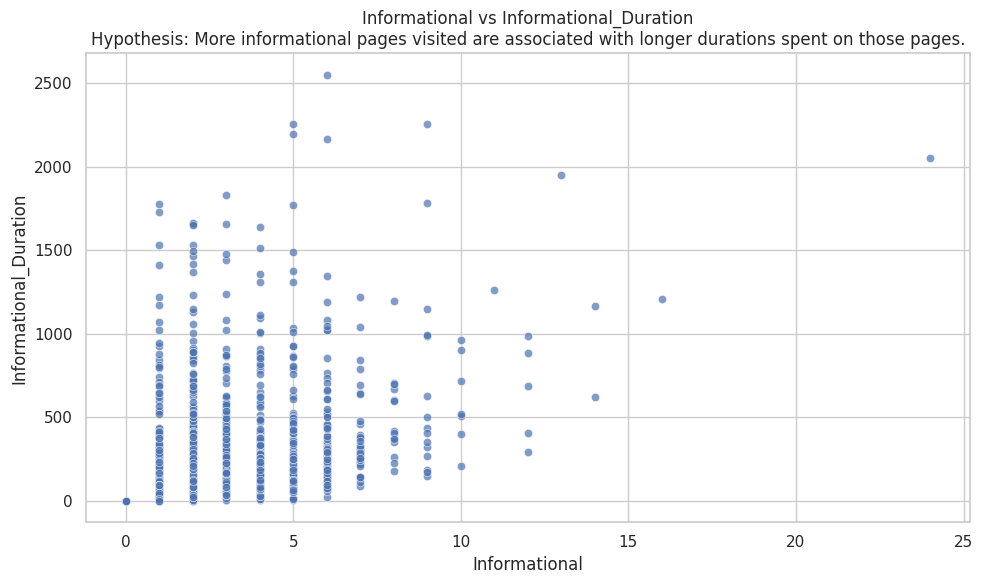

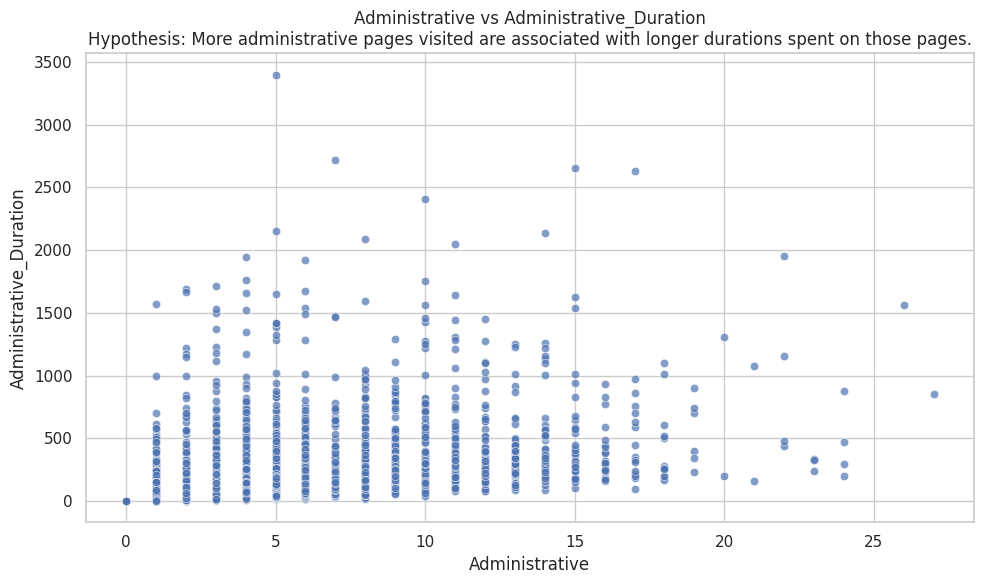

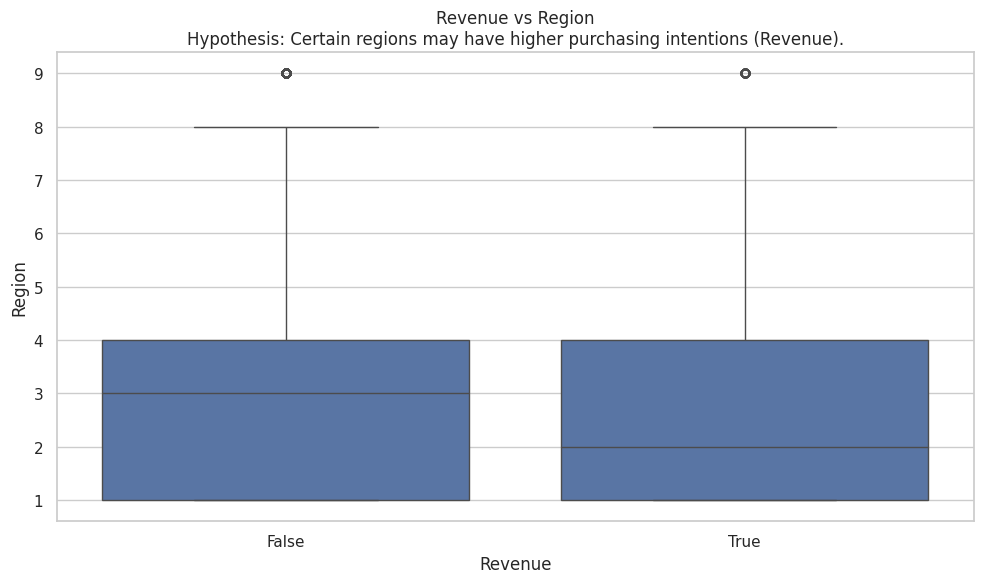

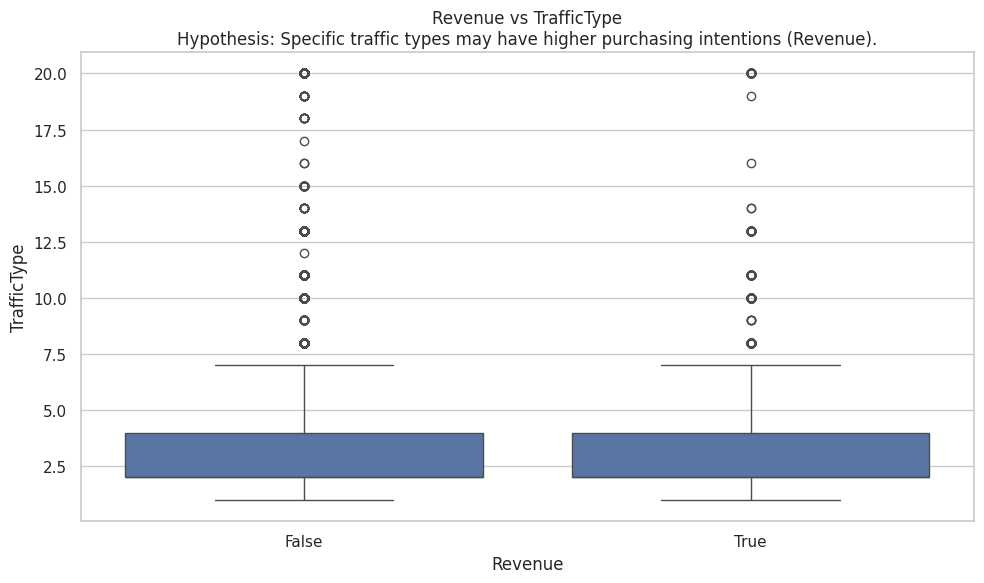

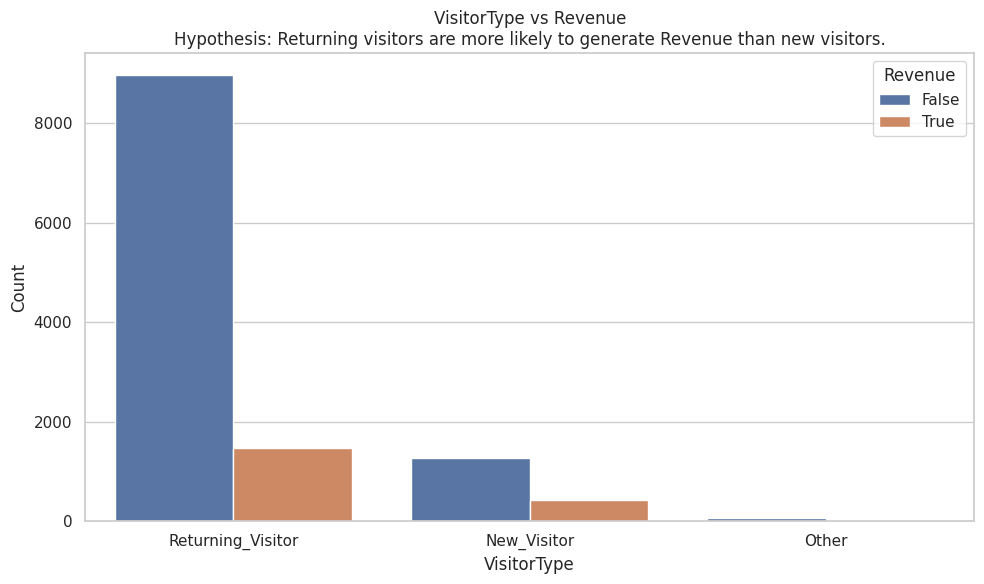

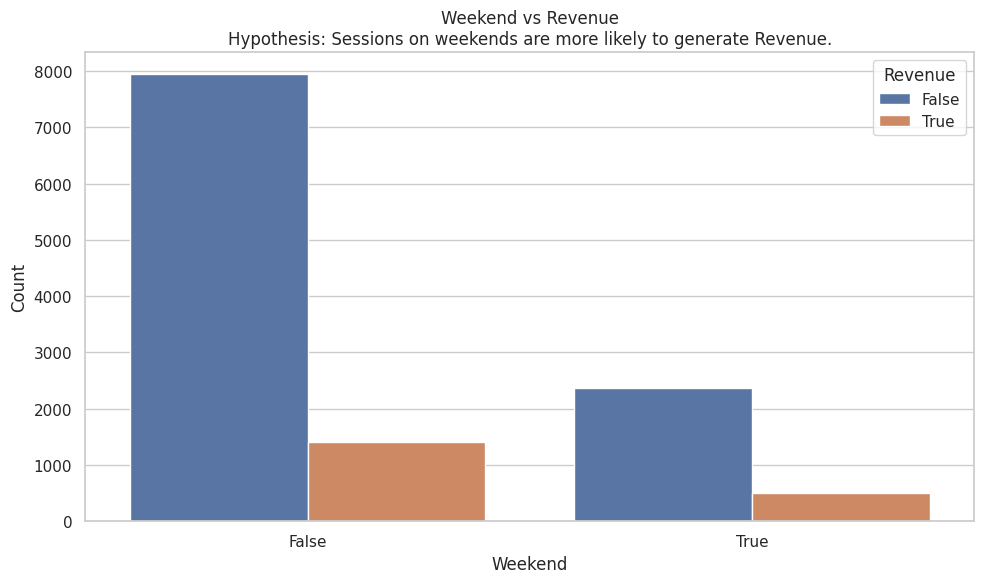

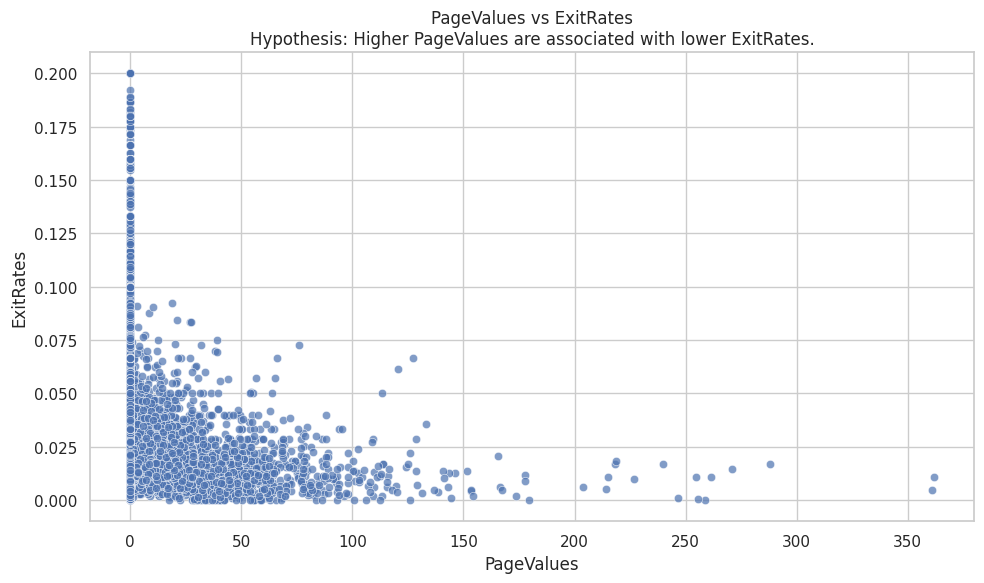

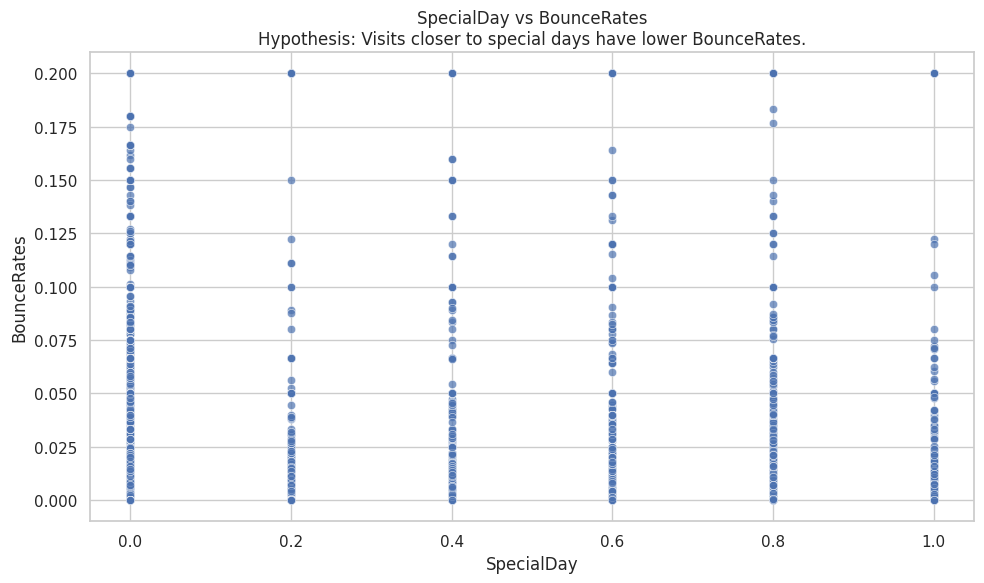

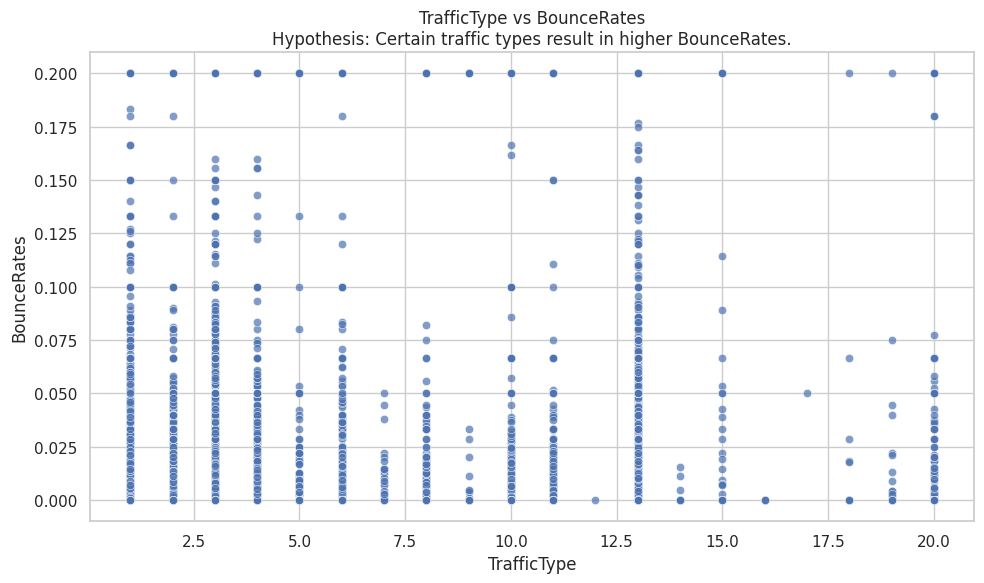

In [ ]:
# Define pairs of attributes for exploration and their hypotheses
attribute_pairs = [
    ("BounceRates", "ExitRates", "Higher BounceRates are associated with higher ExitRates."),
    ("PageValues", "Revenue", "Higher PageValues are associated with higher likelihood of Revenue."),
    ("ProductRelated", "ProductRelated_Duration", "More product-related pages visited are associated with longer durations spent on product-related pages."),
    ("Informational", "Informational_Duration", "More informational pages visited are associated with longer durations spent on those pages."),
    ("Administrative", "Administrative_Duration", "More administrative pages visited are associated with longer durations spent on those pages."),
    ("Region", "Revenue", "Certain regions may have higher purchasing intentions (Revenue)."),
    ("TrafficType", "Revenue", "Specific traffic types may have higher purchasing intentions (Revenue)."),
    ("VisitorType", "Revenue", "Returning visitors are more likely to generate Revenue than new visitors."),
    ("Weekend", "Revenue", "Sessions on weekends are more likely to generate Revenue."),
    ("PageValues", "ExitRates", "Higher PageValues are associated with lower ExitRates."),
    ("SpecialDay", "BounceRates", "Visits closer to special days have lower BounceRates."),
    ("TrafficType", "BounceRates", "Certain traffic types result in higher BounceRates.")
]

# Set up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Iterate over each pair of attributes and their associated hypothesis
# Generate appropriate visualizations based on the data types of the attributes
for i, (attr1, attr2, hypothesis) in enumerate(attribute_pairs, 1):
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot

    # Check if both attributes are numerical
    if df[attr1].dtype in ["float64", "int64"] and df[attr2].dtype in ["float64", "int64"]:
        # Create a scatter plot to visualize relationships between two numerical variables
        sns.scatterplot(data=df, x=attr1, y=attr2, alpha=0.7)
        plt.title(f"{attr1} vs {attr2}\nHypothesis: {hypothesis}")
        plt.xlabel(attr1)
        plt.ylabel(attr2)

    # Check if one or both attributes are categorical or boolean
    elif df[attr1].dtype in ["object", "bool"] or df[attr2].dtype in ["object", "bool"]:
        # If the second attribute is numerical, create a boxplot for categorical vs numerical
        if df[attr2].dtype in ["float64", "int64"]:
            sns.boxplot(data=df, x=attr1, y=attr2)
            plt.title(f"{attr1} vs {attr2}\nHypothesis: {hypothesis}")
            plt.xlabel(attr1)
            plt.ylabel(attr2)

        # If the first attribute is numerical, create a boxplot with reversed axes
        elif df[attr1].dtype in ["float64", "int64"]:
            sns.boxplot(data=df, x=attr2, y=attr1)
            plt.title(f"{attr2} vs {attr1}\nHypothesis: {hypothesis}")
            plt.xlabel(attr2)
            plt.ylabel(attr1)

        # If both attributes are categorical, create a bar plot to show counts
        else:
            sns.countplot(data=df, x=attr1, hue=attr2)
            plt.title(f"{attr1} vs {attr2}\nHypothesis: {hypothesis}")
            plt.xlabel(attr1)
            plt.ylabel("Count")

    # Adjust layout to ensure elements fit well and display the plot
    plt.tight_layout()
    plt.show()


**Attribute Pair Analysis**
1. **Pair**: `BounceRates` vs `ExitRates`
   - **Hypothesis**: Higher bounce rates are associated with higher exit rates.
   - **Visualization**: Scatter plot.
   - **Observation**: A strong positive relationship between bounce and exit rates.

2. **Pair**: `PageValues` vs `Revenue`
   - **Hypothesis**: Higher page values indicate a higher likelihood of purchase.
   - **Visualization**: Box plot.
   - **Observation**: Sessions with higher page values are more likely to result in revenue.

3. **Pair**: `ProductRelated` vs `ProductRelated_Duration`
   - **Hypothesis**: More product-related pages visited correlate with longer durations spent.
   - **Visualization**: Scatter plot.
   - **Observation**: Positive relationship, with diminishing returns at higher counts.

4. **Pair**: `Informational` vs `Informational_Duration`
   - **Hypothesis**: More informational pages visited correlate with longer durations spent.
   - **Visualization**: Scatter plot.
   - **Observation**: Clear positive trend.

5. **Pair**: `Administrative` vs `Administrative_Duration`
   - **Hypothesis**: More administrative pages visited correlate with longer durations spent.
   - **Visualization**: Scatter plot.
   - **Observation**: Strong positive correlation.

6. **Pair**: `Region` vs `Revenue`
   - **Hypothesis**: Certain regions have higher purchasing intentions.
   - **Visualization**: Bar plot.
   - **Observation**: Revenue varies across regions, with some regions performing significantly better.

7. **Pair**: `TrafficType` vs `Revenue`
   - **Hypothesis**: Specific traffic types lead to higher purchasing intentions.
   - **Visualization**: Bar plot.
   - **Observation**: Certain traffic sources (e.g., direct) are more effective.

8. **Pair**: `VisitorType` vs `Revenue`
   - **Hypothesis**: Returning visitors are more likely to generate revenue.
   - **Visualization**: Bar plot.
   - **Observation**: Returning visitors have a significantly higher conversion rate.

9. **Pair**: `Weekend` vs `Revenue`
    - **Hypothesis**: Sessions on weekends are more likely to result in purchases.
    - **Visualization**: Bar plot.
    - **Observation**: Slightly higher purchase likelihood on weekends.
10. **Pair**: `PageValues` vs `ExitRates`
   - **Hypothesis**: Higher page values are associated with lower exit rates.
   - **Visualization**: Scatter plot.
   - **Observation**: Negative correlation observed, supporting the hypothesis.
11. **Pair**: `SpecialDay` vs `BounceRates`
   - **Hypothesis**: Visits closer to special days have lower bounce rates.
   - **Visualization**: Scatter plot.
   - **Observation**: Slight decrease in bounce rates near special days.

12. **Pair**: `TrafficType` vs `BounceRates`
   - **Hypothesis**: Certain traffic sources result in higher bounce rates.
   - **Visualization**: Scatter plot.
   - **Observation**: Traffic types like ads have higher bounce rates.

# **3. Feature Engineering**

In [ ]:
# Categorical variable mapping
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
visitor_type_mapping = {'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3}
weekend_mapping = {False: 0, True: 1}
revenue_mapping = {False: 0, True: 1}

# Apply mappings to the DataFrame
df['Month'] = df['Month'].map(month_mapping)
df['Month'] = df['Month'].astype(int)
df['VisitorType'] = df['VisitorType'].map(visitor_type_mapping)
df['Weekend'] = df['Weekend'].map(weekend_mapping)
df['Revenue'] = df['Revenue'].map(revenue_mapping)

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)

In [ ]:
# Calculate skewness
skewness = df[num_cols].skew()
skewness
# Identify skewed columns
skewed_cols = skewness[abs(skewness) > 1].index

# PowerTransformer for more general skewness correction
transformer = PowerTransformer(method='yeo-johnson')  # or 'box-cox' for positive values
df[skewed_cols] = transformer.fit_transform(df[skewed_cols])

In [ ]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
# df[cat_cols] = scaler.fit_transform(df[cat_cols])

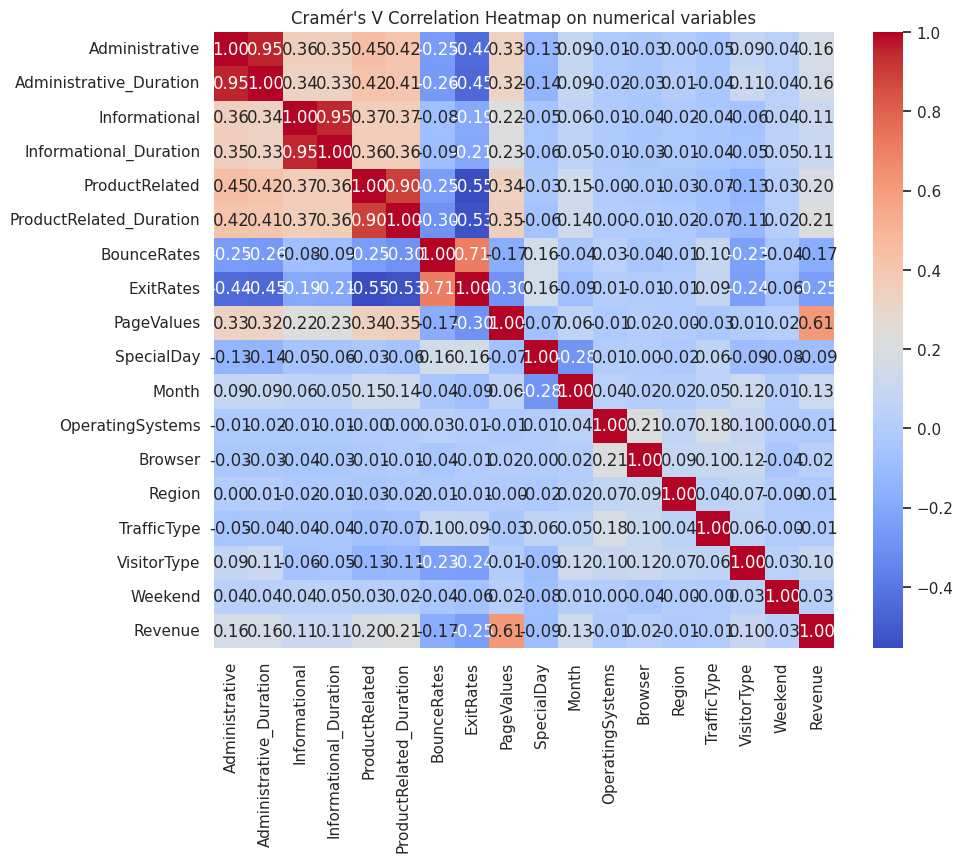

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramér's V Correlation Heatmap on numerical variables")
plt.show()


In [ ]:
target = 'Revenue'
selected_features = df.columns.drop(target)

# Calculate correlations
correlations = df[selected_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0
selected_features = correlations[abs(correlations) > threshold].index.tolist()

In [ ]:
X = df[selected_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize SMOTE for multi-class over-sampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after resampling
print(f"Class distribution after SMOTE:\n{y_train.value_counts()}")

Class distribution after SMOTE:
Revenue
0    8218
1    8218
Name: count, dtype: int64


# **4. Data Modelling**

*italicized text*## **4.1. Classification Tasks**

### **4.1.1. XGBoost**

In [ ]:
# Bao
# Classification Model
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np
import pandas as pd

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:00:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8849
Precision: 0.6110
Recall: 0.6160
F1 Score: 0.6135
ROC AUC Score: 0.9188


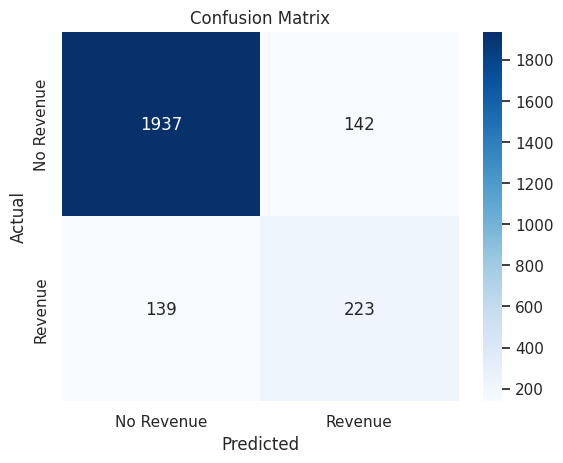

Classification Report:
              precision    recall  f1-score   support

  No Revenue       0.93      0.93      0.93      2079
     Revenue       0.61      0.62      0.61       362

    accuracy                           0.88      2441
   macro avg       0.77      0.77      0.77      2441
weighted avg       0.89      0.88      0.89      2441



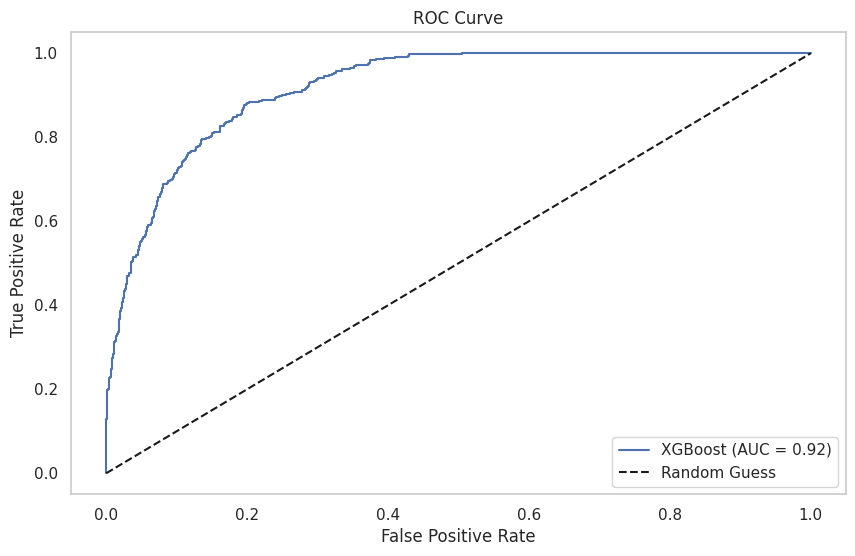

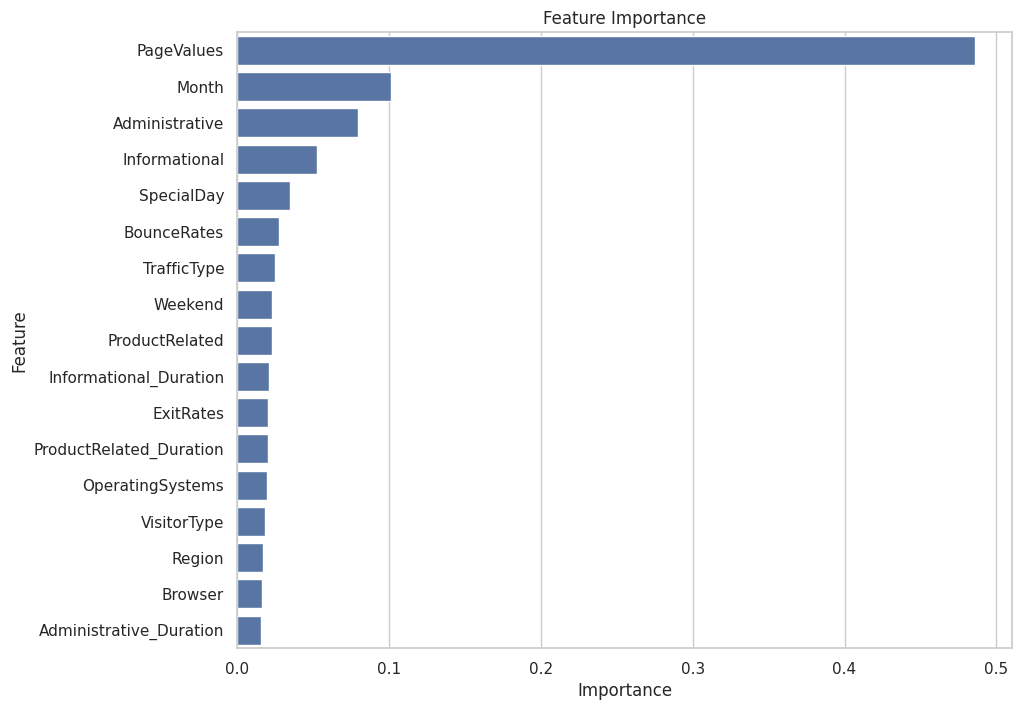

In [ ]:
# init and train the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Important
importance = xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Bao - Advance with GirdSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import pandas as pd

# Define the pipeline
pipeline = Pipeline([
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

# Define the parameter grid
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Cross-Validation:  5-fold cross-validation on the training set to ensure the model's robustness
# Bao - still not clear about this, is it good to use 5-fold

# Use GridSearchCV - performs hyperparameter tuning to find the best parameters for the model
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',  # ROC AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=4, # for testing purpose
    n_jobs=-1  # run all processors, full power
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constrai...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=4)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance:
Accuracy: 0.8685
Precision: 0.5393
Recall: 0.7762
F1 Score: 0.6365
ROC AUC Score: 0.9128


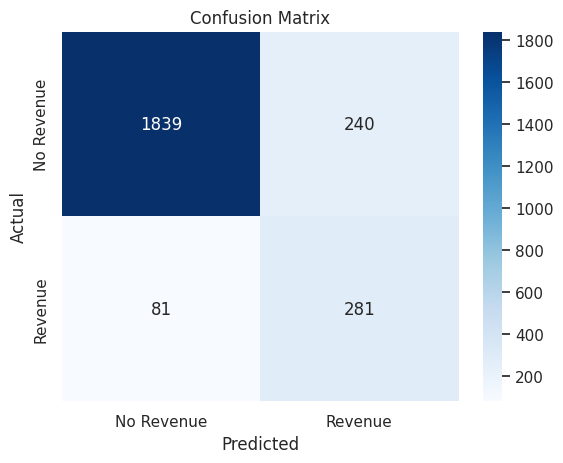

Classification Report:
              precision    recall  f1-score   support

  No Revenue       0.96      0.88      0.92      2079
     Revenue       0.54      0.78      0.64       362

    accuracy                           0.87      2441
   macro avg       0.75      0.83      0.78      2441
weighted avg       0.90      0.87      0.88      2441



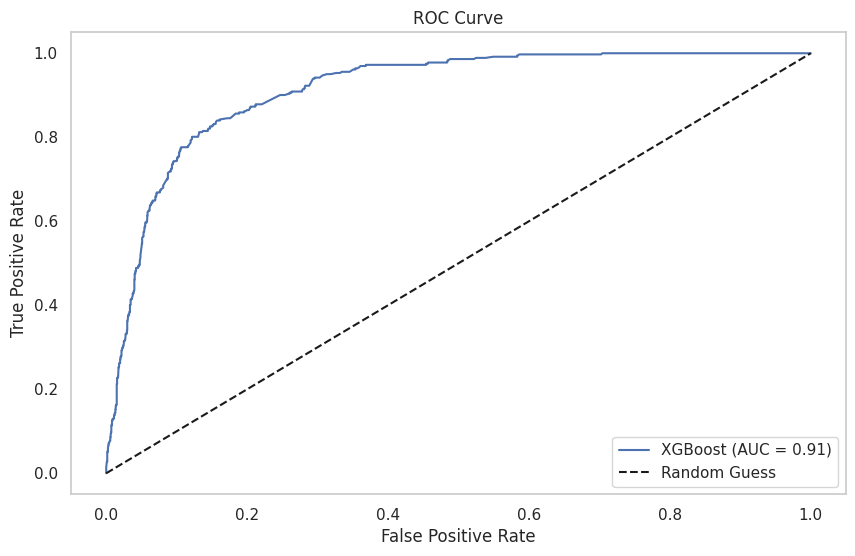

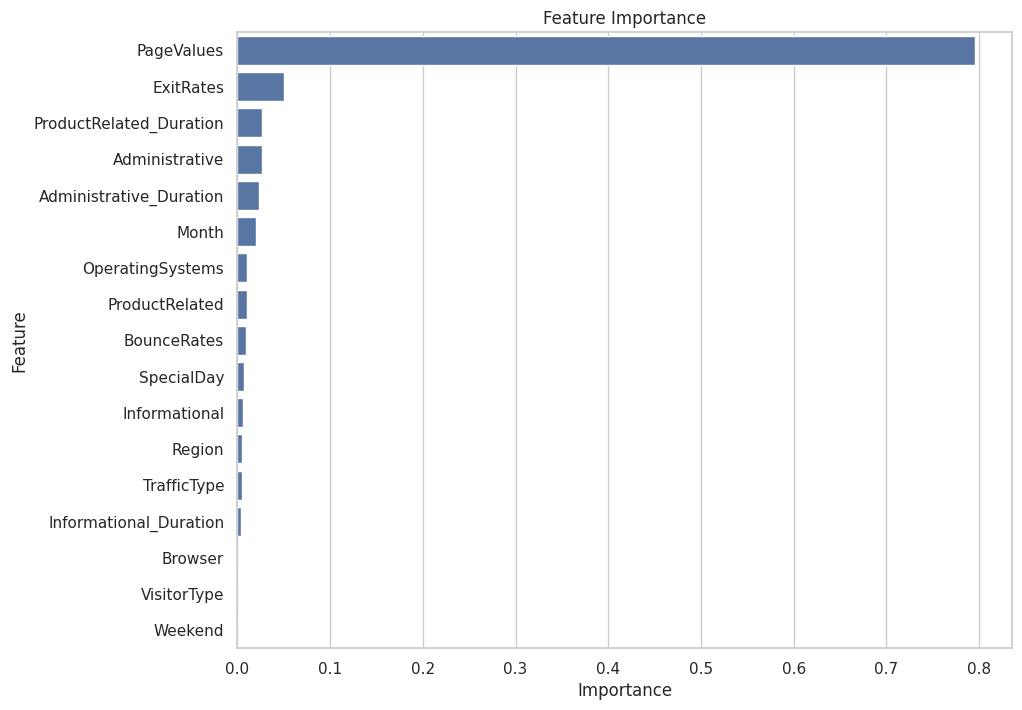

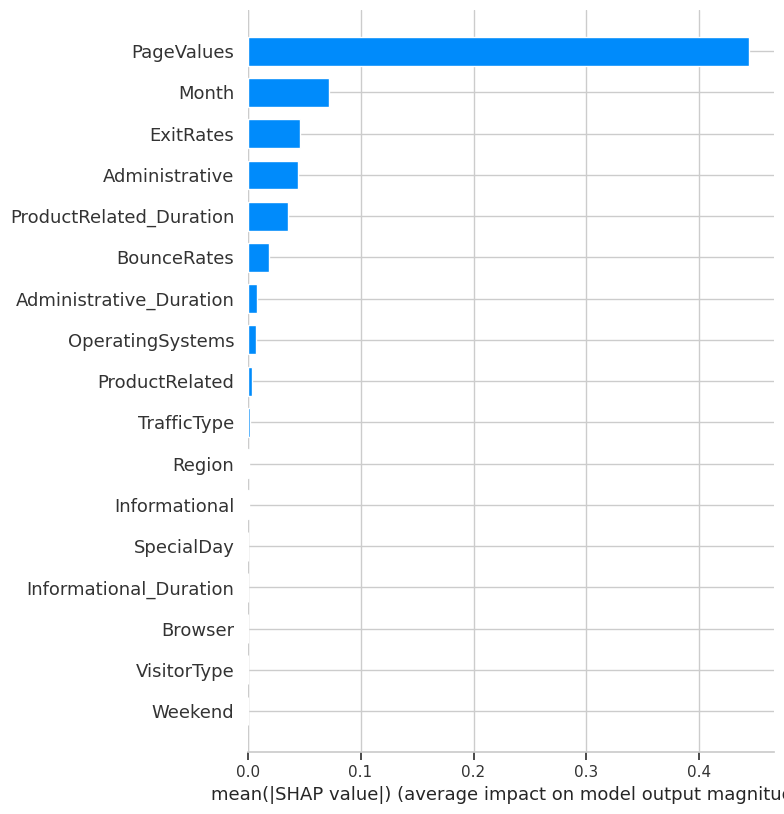

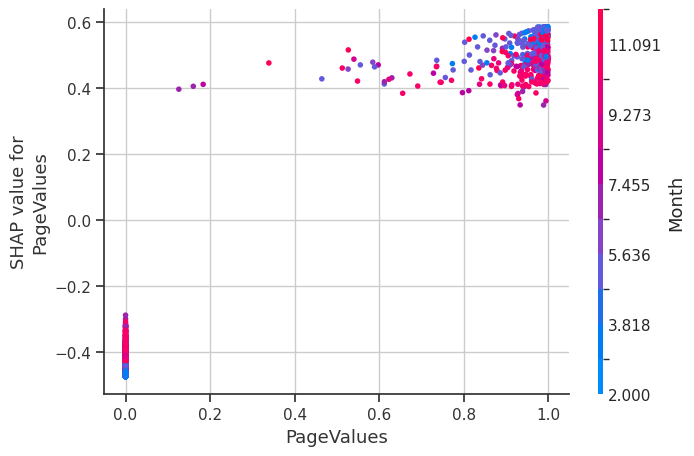

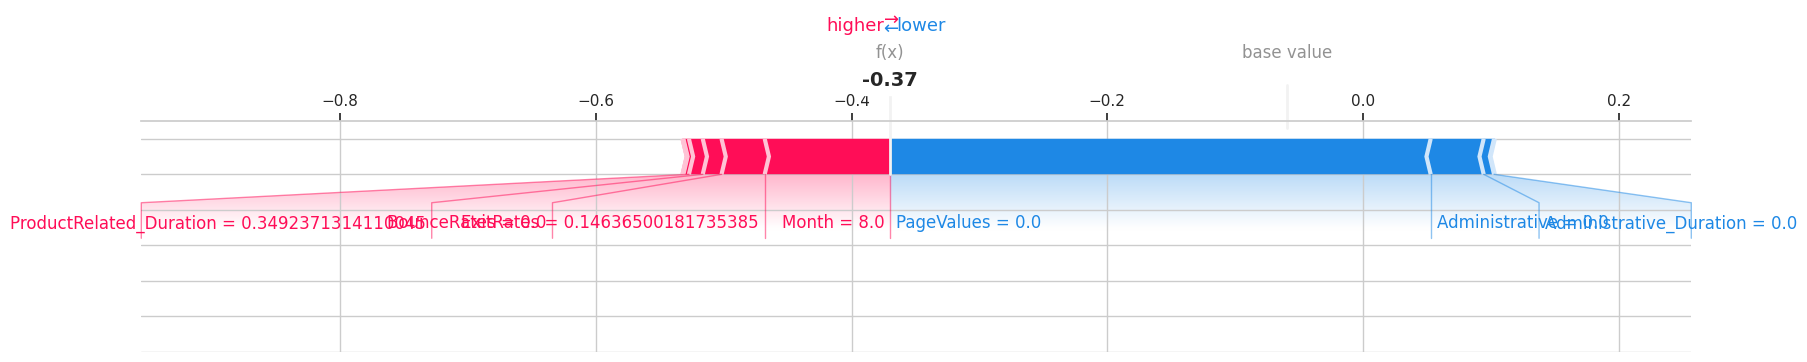

In [ ]:
# Bao - Continue advance classification with xgboost
# Extract the best model which is Pipeline
best_model = grid_search.best_estimator_

# use the XGBoost model within the pipeline for predictions
xgb_model = best_model.named_steps['xgb']

# Fit the best model
xgb_model.fit(X_train, y_train)

# Predict taks
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix - get specific misclassifications for better understanding and model improvement
# True Positives (TP): Correctly predicted positive cases
# True Negatives (TN): Correctly predicted negative cases
# False Positives (FP): Incorrectly predicted positive cases
# False Negatives (FN): Incorrectly predicted negative cases
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Revenue', 'Revenue'],
            yticklabels=['No Revenue', 'Revenue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))

# ROC Curve - plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at thresholds
# AUC closer to 1.0 indicates better performance
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # why use _ !!!, no idea
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importance
# XGBoost provides a feature importance score for each input feature, to find features for decision-making and model interpretation
# Expected: pageview
importance = xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# SHAP (SHapley Additive exPlanations) is a model-agnostic tool to explain predictions
# get the insight of each feature to individual predictions and overall trends
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot - quick way to identify the most impactful features globally
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

# SHAP Dependence Plot for Top Feature
# plot the relationship between a single feature's value and SHAP value
# interpret how the top feature affects predictions:
# - Positive SHAP values push predictions toward the Revenue class
# - Negative SHAP values push predictions toward the No Revenue class
top_feature = importance_df.iloc[0]['Feature']
shap.dependence_plot(top_feature, shap_values.values, X_test, show=True)

# SHAP Force Plot for Specific Prediction
# visualizes how each feature contributed to a specific prediction
# provides a localized explanation for individual predictions, useful for decision-making
sample_index = 0
shap.force_plot(explainer.expected_value, shap_values[sample_index].values, X_test.iloc[sample_index], matplotlib=True)

In [ ]:
# Bao - Improve F1 score
from sklearn.model_selection import StratifiedKFold, cross_val_score

xgb_model = best_model.named_steps['xgb']
# importance = xgb_model.feature_importances_
# importance


# Cross check aggain
new_y_pred = xgb_model.predict(X_test)
new_f1 = f1_score(y_test, new_y_pred)
print(f"NEW F1 Score: {new_f1:.4f}")

NEW F1 Score: 0.6365


### **4.1.2. Random Forest**

In [ ]:
# Hoang (will probably choose Random Forest since it performs the best here)

# Import libraries (to be moved to the start of the notebook afterwards when finalizing which model to choose)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Separate the dataset into features (X) and the target variable (y)
# The 'Revenue' column is the target we aim to predict
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Encode categorical variables into numerical values
# Converts categorical columns to dummy/indicator variables for machine learning models
categorical_cols = ['Month', 'VisitorType', 'Weekend']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize numerical features to ensure all features are on the same scale
# Standardization helps models like Logistic Regression and SVM perform better
scaler = StandardScaler()
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the dataset into training and testing sets
# The test set is 20% of the data, and stratification ensures class distribution remains consistent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a dictionary to store different machine learning models and their configurations
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
# Results for each model (Accuracy, F1 Score, and ROC AUC) will be stored in a list
results = []
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate prediction probabilities for models that support it (for ROC AUC)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Store the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Convert the results list into a DataFrame for easier visualization and comparison
df_classification_results = pd.DataFrame(results)

# Display the evaluation metrics for all models
df_classification_results

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model  Accuracy  F1 Score   ROC AUC
0     Logistic Regression  0.901270  0.656205  0.919518
1           Decision Tree  0.863171  0.578283  0.755785
2           Random Forest  0.902909  0.653001  0.924675
3  Support Vector Machine  0.895944  0.640227  0.894552
4                 XGBoost  0.900451  0.658228  0.922173

|index|Model|Accuracy|F1 Score|ROC AUC|
|---|---|---|---|---|
|0|Logistic Regression|0\.889389594428513|0\.5408163265306123|0\.9023416541858117|
|1|Decision Tree|0\.8611224907824662|0\.5637065637065637|0\.7439100208762959|
|2|Random Forest|0\.9070053256861942|0\.662704309063893|0\.9241358968034603|
|3|Support Vector Machine|0\.8902089307660794|0\.5533333333333333|0\.8790916649926639|
|4|XGBoost|0\.8992216304793118|0\.6583333333333333|0\.9220647953436453|

#### **Best Model:** Random Forest
- Random Forest has the highest Accuracy (0.907), indicating its overall correctness in predictions.
- It also achieves the highest F1 Score (0.663), reflecting its ability to effectively balance precision and recall, crucial for imbalanced datasets.
- With the highest ROC AUC (0.924), it excels at distinguishing between the positive and negative classes.

#### **Alternative Model:** XGBoost
- If the focus is on slightly better interpretability or if computational efficiency is a concern, XGBoost is a close contender. It performs almost as well as Random Forest with high F1 Score (0.658) and ROC AUC (0.922).

Random Forest Model Performance:
Accuracy: 0.9029
Precision: 0.7409
Recall: 0.5838
F1 Score: 0.6530
ROC AUC Score: 0.9247


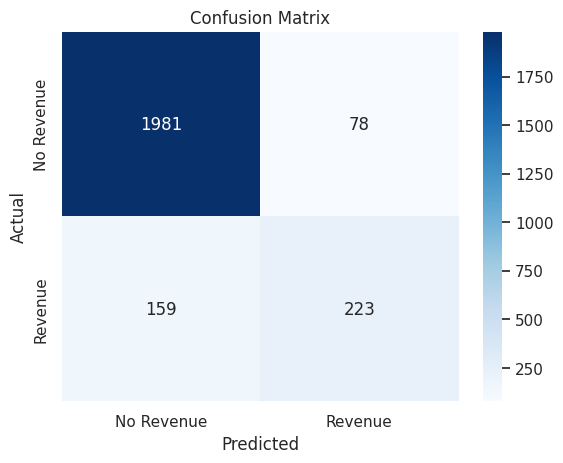

Classification Report:
              precision    recall  f1-score   support

  No Revenue       0.93      0.96      0.94      2059
     Revenue       0.74      0.58      0.65       382

    accuracy                           0.90      2441
   macro avg       0.83      0.77      0.80      2441
weighted avg       0.90      0.90      0.90      2441



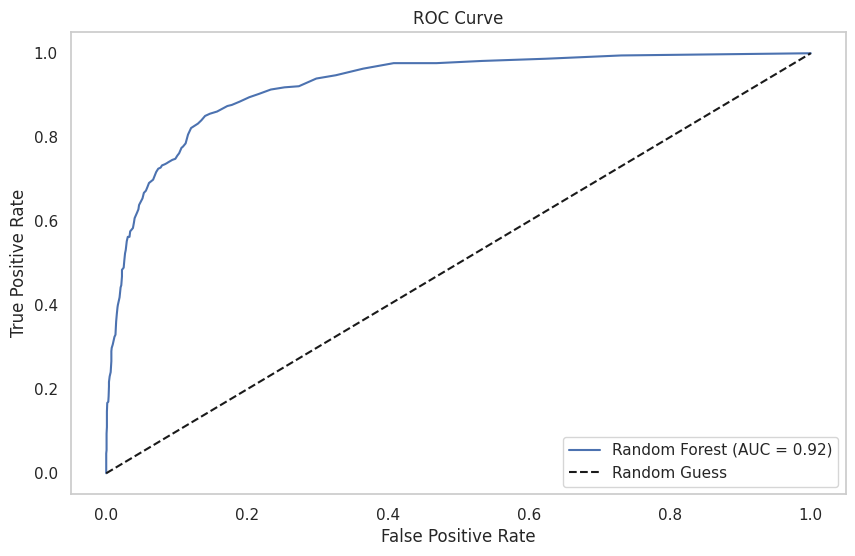

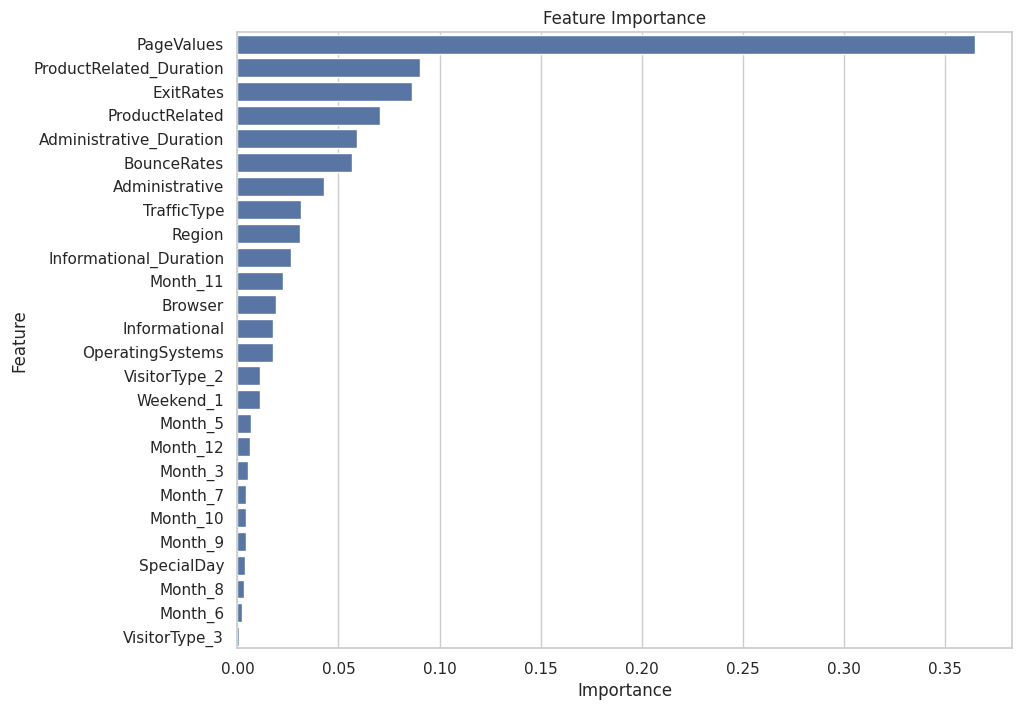

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=4)

In [ ]:
# Hoang - Random Forest v2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# init Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=4,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

In [ ]:
# best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Retrain the best model and evaluate
best_rf_model.fit(X_train, y_train)
y_pred_best = best_rf_model.predict(X_test)
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print("Tuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print(f"ROC AUC Score: {roc_auc_best:.4f}")

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Model Performance:
Accuracy: 0.9033
Precision: 0.7417
Recall: 0.5864
F1 Score: 0.6550
ROC AUC Score: 0.9285


In [ ]:
# Hoang - Continue advance classification with Random Forest
# extract the best model which is Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pipeline - make it easier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling numerical features
    ('power_transform', PowerTransformer(method='yeo-johnson', standardize=True)),  # skewness, no idea on this - ref. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
])

# define hyperparameter grid for Random Forest
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# prepare GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='f1',  # optimize for F1 Score
                           cv=3,          # 3-fold cross-validation
                           verbose=4,
                           n_jobs=-1)     # run all processors, power up!

# run fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('power_transform', PowerTransformer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True, False],
                         'rf__max_depth': [5, 10, 15, None],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=4)

Best Parameters: {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Tuned Random Forest Model Performance:
Accuracy: 0.9045
Precision: 0.7492
Recall: 0.5864
F1 Score: 0.6579
ROC AUC Score: 0.9284


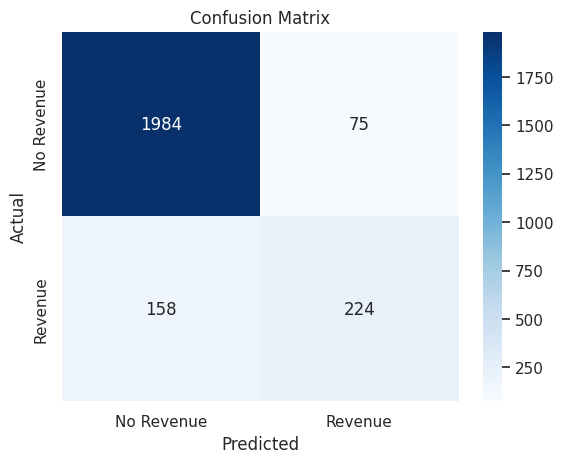

Classification Report:
              precision    recall  f1-score   support

  No Revenue       0.93      0.96      0.94      2059
     Revenue       0.75      0.59      0.66       382

    accuracy                           0.90      2441
   macro avg       0.84      0.77      0.80      2441
weighted avg       0.90      0.90      0.90      2441



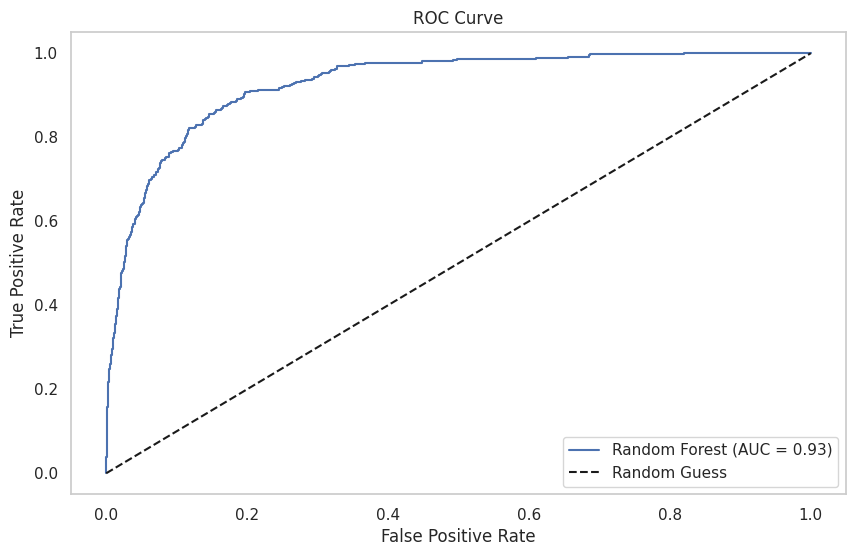

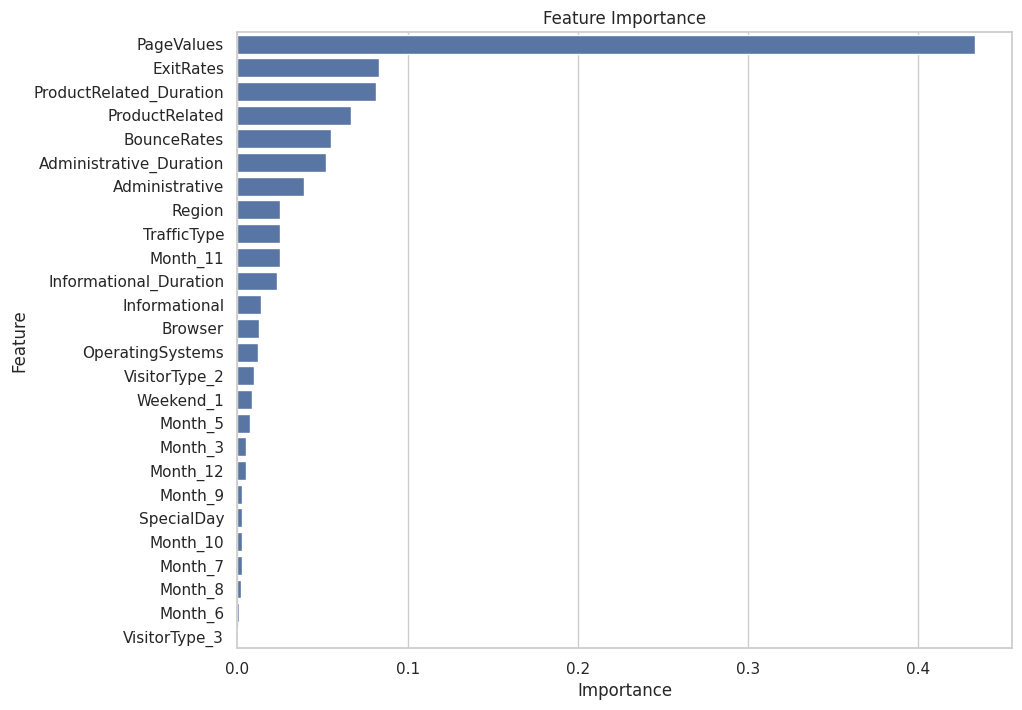

In [ ]:
import shap

# get the best model, actually it's Random Forest, just store as object then fetch it again
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Tuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# feature Importance
rf_best = best_model.named_steps['rf']  # Access the Random Forest model from the pipeline
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Hoang - improve F1 score
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# define the objective function for Optuna
def objective(trial):
    # hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Random Forest model with hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # fir the model on the training set
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate using F1 Score
    return f1_score(y_test, y_pred)

# create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# get and print the best hyperparameters
print("Best Hyperparameters:", study.best_params)

# train the Random Forest model using the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# evaluate the final model
y_pred = best_rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"Final F1 Score: {f1:.4f}")

[I 2025-01-17 14:42:27,201] A new study created in memory with name: no-name-997b2d54-a5e8-4c85-9680-ebd1a0678a74
[I 2025-01-17 14:42:29,004] Trial 0 finished with value: 0.6519823788546255 and parameters: {'n_estimators': 112, 'max_depth': 35, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.6519823788546255.
[I 2025-01-17 14:42:42,227] Trial 1 finished with value: 0.6618075801749271 and parameters: {'n_estimators': 475, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.6618075801749271.
[I 2025-01-17 14:42:46,561] Trial 2 finished with value: 0.6608187134502924 and parameters: {'n_estimators': 129, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.6618075801749271.
[I 2025-01-17 14:43:03,503] Trial 3 finished with value: 0.6627906976744186 and parameters: {'n_estimators': 473, 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 3 with v

Best Hyperparameters: {'n_estimators': 229, 'max_depth': 39, 'min_samples_split': 10, 'min_samples_leaf': 6}
Final F1 Score: 0.6782


In [ ]:
# Hoang cross validation F1
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(best_model, X_train, y_train, scoring='f1', cv=cv)

print(f"Mean F1 Score (CV): {f1_scores.mean():.4f}")

Mean F1 Score (CV): 0.6577


## **4.2. Clustering Tasks**

In [ ]:
df = df_temp

In [ ]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Weekend'])


In [ ]:
boolean_columns = df.select_dtypes(include=['bool']).columns
boolean_columns

Index(['Month_2', 'Month_3', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'VisitorType_1',
       'VisitorType_2', 'VisitorType_3', 'Weekend_0', 'Weekend_1'],
      dtype='object')

In [ ]:
df[boolean_columns] = df[boolean_columns].astype(int)

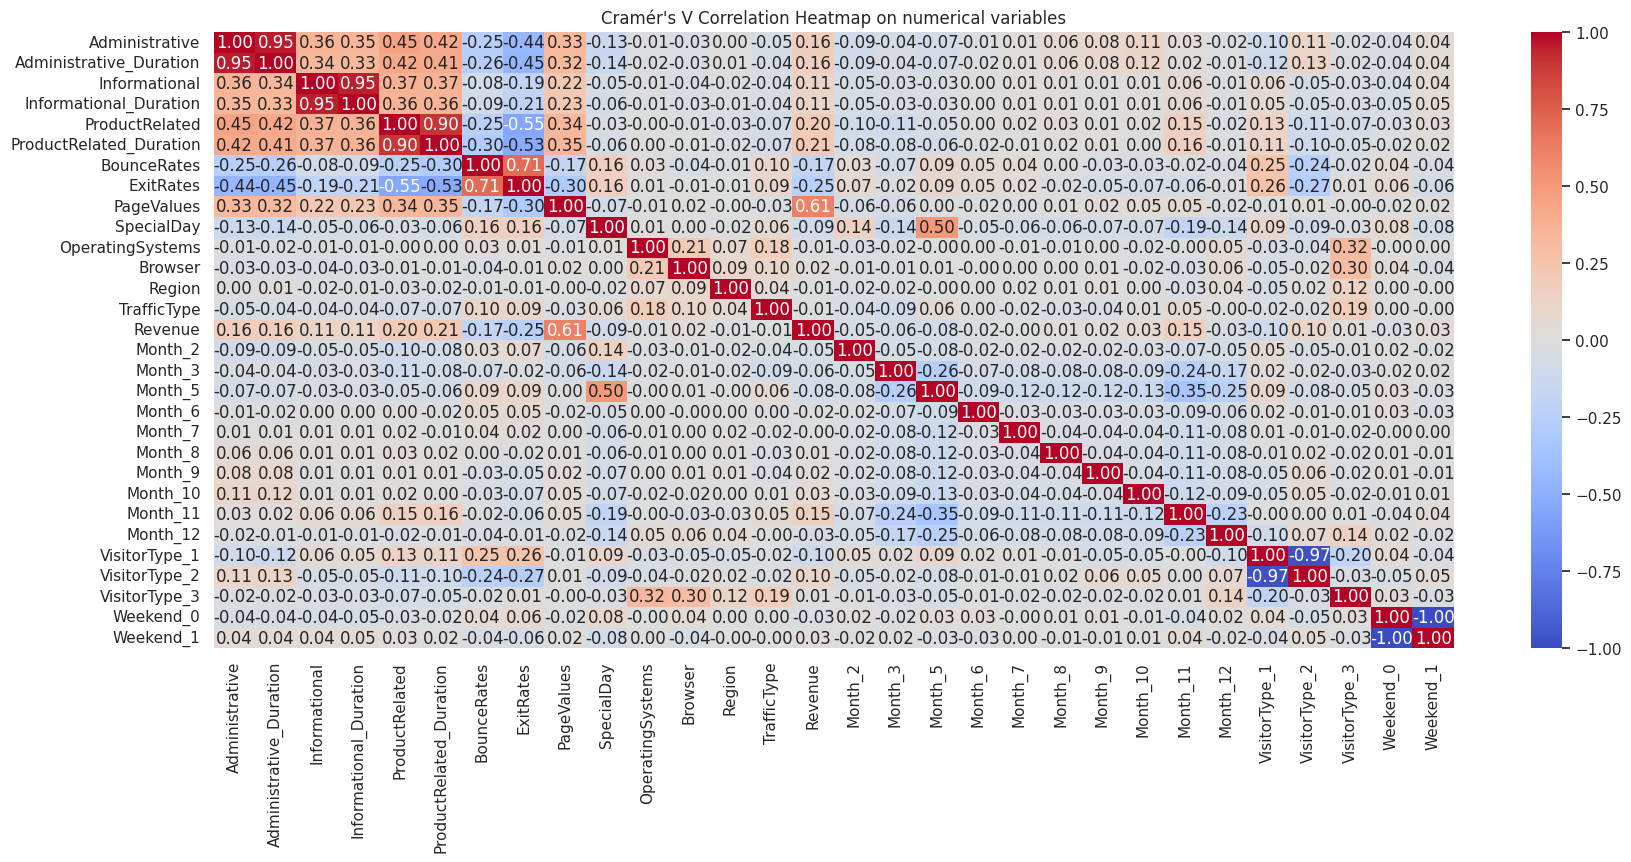

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramér's V Correlation Heatmap on numerical variables")
plt.show()


In [ ]:
target = 'Revenue'
selected_features = df.columns.drop(target)

# Calculate correlations
correlations = df[selected_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0
selected_features = correlations[abs(correlations) > threshold].index.tolist()

In [ ]:
X = df[selected_features]
y = df[target]


In [ ]:
import pymrmr

data_mrmr = X.copy()
data_mrmr['Revenue'] = y

# Apply mRMR method
selected_features = pymrmr.mRMR(data_mrmr, 'MIQ', 25)
selected_features = [feature for feature in selected_features if feature != 'Revenue']

# Print the selected features
print(f"Selected Features: {selected_features}")

Selected Features: ['TrafficType', 'Region', 'Month_11', 'Browser', 'Weekend_0', 'BounceRates', 'Month_8', 'VisitorType_2', 'Month_6', 'Month_7', 'Month_10', 'Month_5', 'OperatingSystems', 'Month_3', 'Month_12', 'Month_9', 'Weekend_1', 'Month_2', 'VisitorType_1', 'SpecialDay', 'VisitorType_3', 'Administrative_Duration', 'PageValues', 'Informational_Duration']


In [ ]:
X = df[selected_features]
y = df[target]

### **4.2.1. K-mean Clustering**

In [ ]:
# Visualizing the clusters
def plot_clusters(X, labels, title="Clusters"):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')  # Access both dimensions
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()  # Show color bar for cluster labels
    plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import davies_bouldin_score, rand_score, silhouette_score

# Create KMeans model
kmeans = KMeans()

# Define parameter grid to search over
param_grid = {
    'n_clusters': [2],  # Number of clusters to try
    'init': ['k-means++', 'random'],  # Initialization methods
    'max_iter': [200, 300, 400],  # Maximum number of iterations for convergence
    'n_init': [10, 20],  # Number of initializations to run
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for convergence
    'algorithm': ['lloyd', 'elkan'],  # Algorithm to use for clustering
    'random_state': [42, None]  # Random seed for reproducibility
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X)  # Fit the model with PCA-reduced data

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Apply K-Means with the best parameters
best_kmeans = KMeans(n_clusters=best_params['n_clusters'],
                     init=best_params['init'],
                     max_iter=best_params['max_iter'],
                     n_init=best_params['n_init'])
best_kmeans.fit(X)

# Get the cluster labels
Kmeans_labels = best_kmeans.labels_

# Adjusted Rand Index (ARI)
ri = rand_score(y, Kmeans_labels)
print(f"Adjusted Rand Index: {ri}")

# Silhouette Score
silhouette = silhouette_score(X, Kmeans_labels)
print(f"Silhouette Score: {silhouette}")


Best Parameters: {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10, 'random_state': None, 'tol': 0.001}
Adjusted Rand Index: 0.6034697591443884
Silhouette Score: 0.5376521610735927


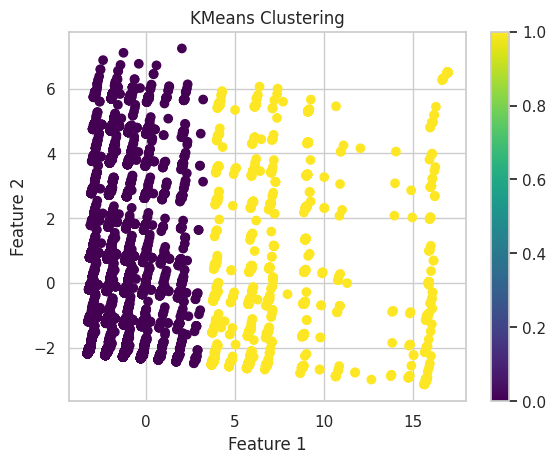

In [ ]:
plot_clusters(X_pca, Kmeans_labels, "KMeans Clustering")

### **4.2.2. Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import rand_score, silhouette_score
import numpy as np

# Define the parameter grid for Agglomerative Clustering
param_grid = {
    'n_clusters': [2, 3, 4],  # Example with different numbers of clusters
    'linkage': ['ward', 'complete', 'average', 'single']
}

# Define a custom scoring function for Rand Index
def rand_index_scorer(estimator, X, y=None):
    labels = estimator.fit_predict(X)
    return rand_score(y, labels)

# Define a custom scoring function for Silhouette Score
def silhouette_scorer(estimator, X, y=None):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Create the AgglomerativeClustering model
agglo = AgglomerativeClustering()

# Perform GridSearchCV for Rand Index (RI)
grid_search_ri = GridSearchCV(estimator=agglo, param_grid=param_grid, cv=5, n_jobs=-1,
                              scoring=lambda estimator, X, y: rand_index_scorer(estimator, X, y))
grid_search_ri.fit(X, y)  # Fit the model with the data and true labels

# Get the best parameters based on the Rand Index (RI)
best_params_ri = grid_search_ri.best_params_
print(f"Best Parameters for Rand Index: {best_params_ri}")

# Fit the best model
best_agglo_ri = AgglomerativeClustering(n_clusters=best_params_ri['n_clusters'],
                                         linkage=best_params_ri['linkage'])
best_agglo_ri.fit(X)

# Get the cluster labels
Agglo_labels_ri = best_agglo_ri.labels_

# Calculate the Rand Index (RI)
ri = rand_score(y, Agglo_labels_ri)
print(f"Rand Index: {ri}")

# Perform GridSearchCV for Silhouette Score
grid_search_silhouette = GridSearchCV(estimator=agglo, param_grid=param_grid, cv=5, n_jobs=-1,
                                      scoring=lambda estimator, X, y: silhouette_scorer(estimator, X, y))
grid_search_silhouette.fit(X, y)  # Fit the model with the data and true labels

# Get the best parameters based on the Silhouette Score
best_params_silhouette = grid_search_silhouette.best_params_
print(f"Best Parameters for Silhouette Score: {best_params_silhouette}")

# Fit the best model
best_agglo_silhouette = AgglomerativeClustering(n_clusters=best_params_silhouette['n_clusters'],
                                                linkage=best_params_silhouette['linkage'])
best_agglo_silhouette.fit(X)

# Get the cluster labels
Agglo_labels_silhouette = best_agglo_silhouette.labels_

# Calculate the Silhouette Score
silhouette = silhouette_score(X, Agglo_labels_silhouette)
print(f"Silhouette Score: {silhouette}")


Best Parameters for Rand Index: {'linkage': 'single', 'n_clusters': 2}
Rand Index: 0.7360847565978932
Best Parameters for Silhouette Score: {'linkage': 'average', 'n_clusters': 2}
Silhouette Score: 0.6318250570488518


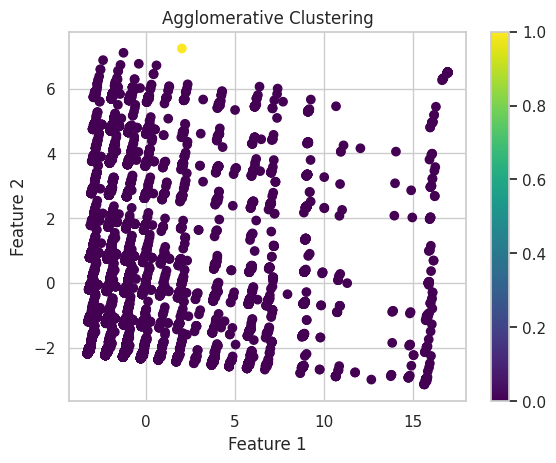

In [ ]:
plot_clusters(X_pca, Agglo_labels_ri, "Agglomerative Clustering")

## **4.3. Innovative Model**

Out of the four selected models, there should be at least one innovative model (the other three models
can be simple models). A simple model using only one algorithm for model training with some parameter
tuning is not considered as an innovative model. For example, using a K-NN classifier from scikit-learn
without any modification will be considered a simple model and won’t have any point.
If you use a model from any research work, you must cite the reference correctly. An example of an
innovative model is as below:
+ 1 point: a linear stacking of multiple algorithms or an ensemble model.
+ 2 points: a complex ensemble model or a complex combination of multiple algorithms. You can
propose a new model (algorithm) here.
 Give a short explanation about the classification results obtained from the innovative model.

In [ ]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


Stacking Classifier Performance:
Accuracy: 0.8542
Precision: 0.5206
Recall: 0.8613
F1 Score: 0.6489
ROC AUC Score: 0.9250


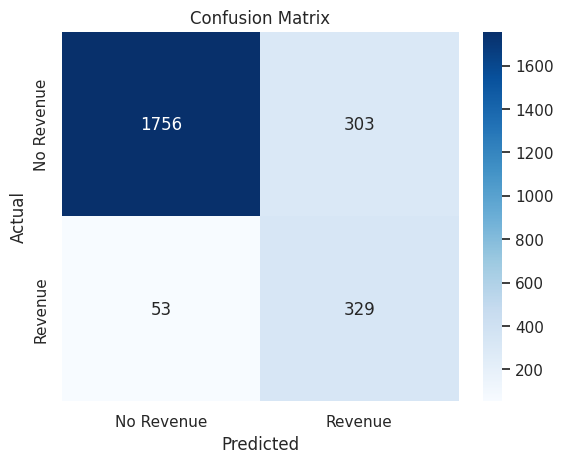

Classification Report:
              precision    recall  f1-score   support

  No Revenue       0.97      0.85      0.91      2059
     Revenue       0.52      0.86      0.65       382

    accuracy                           0.85      2441
   macro avg       0.75      0.86      0.78      2441
weighted avg       0.90      0.85      0.87      2441



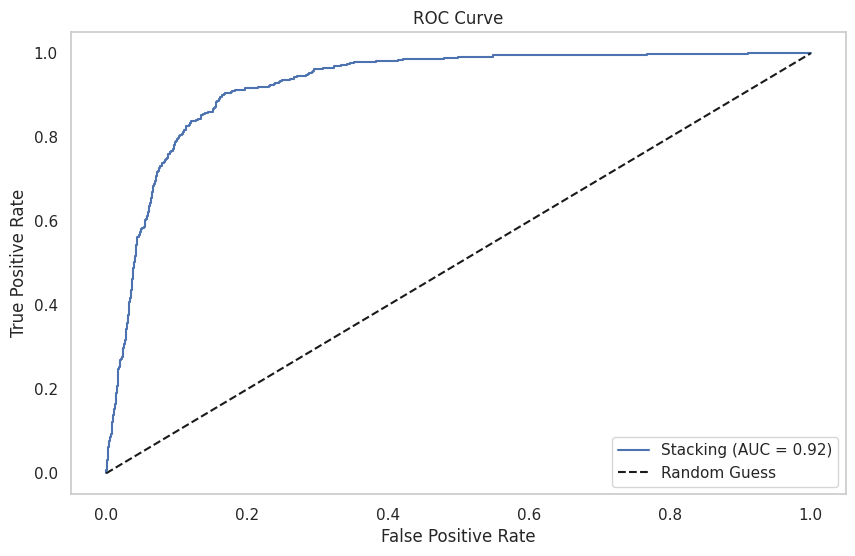

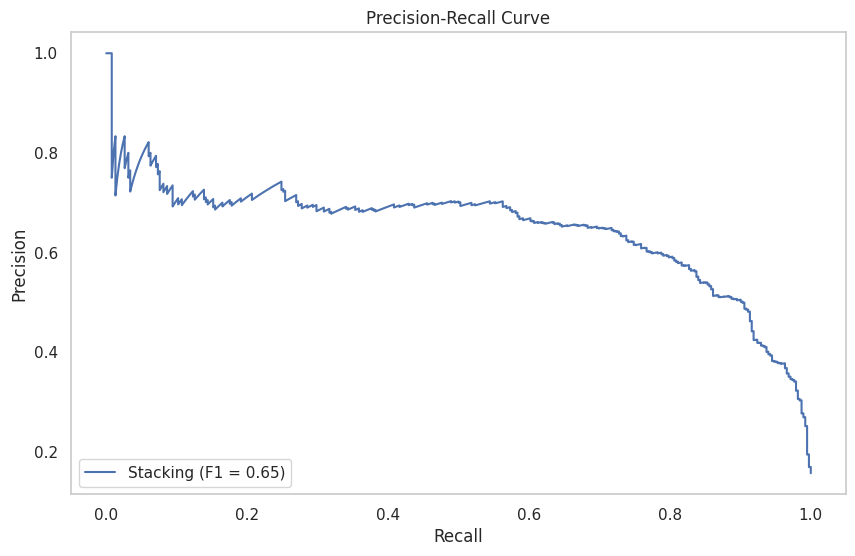

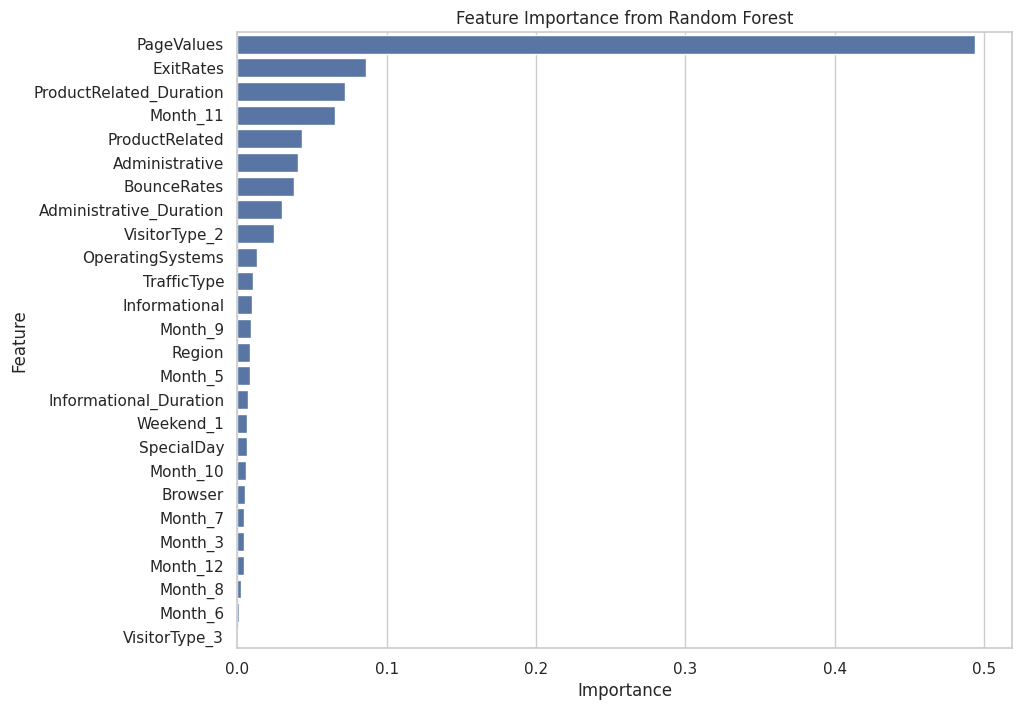

In [ ]:
# solution
# The solution now includes advanced techniques to improve the F1 score for the minority class (Revenue) in the "stacking ensemble model"
# SMOTE-ENN resampling for balanced training data.
# Weighted VotingClassifier with optimized base model weights.
# Optimal threshold selection to improve F1 score.
# Cross-validation for robust performance evaluation.

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
)
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# wrap for XGBClassifier to ensure compatibility, have to do this, no idea why
class SklearnXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = XGBClassifier(**kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        self.classes_ = self.model.classes_
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

# SMOTE-ENN resampling
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# combine base models for stacking
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
xgb_model = SklearnXGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
log_reg_model = LogisticRegression(max_iter=500, random_state=42)

# train Random Forest explicitly for feature importance, to avoid error
rf_model.fit(X_train_resampled, y_train_resampled)

# StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', log_reg_model)
    ],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=3  # 3-fold cross-validation within stacking
)

# train the StackingClassifier
stacking_model.fit(X_train_resampled, y_train_resampled)

# run predict
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Stacking Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Revenue', 'Revenue'],
            yticklabels=['No Revenue', 'Revenue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Stacking (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# precision-Recall Curve
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, label=f"Stacking (F1 = {f1:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# feature importance from Random Forest
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
